# EDA

- [Introducción a los datos](#Contexto)
- [Descripción del dataset](#Descripción-del-dataset)
- [Importar librerías](#Importar-librerías)
- [Lectura de datos](#Lectura-de-datos)
- [EDA](#Exploratory-Data-Analysis)
    - [Hipótesis previas](#Hipótesis-previas)
    - [Exploración](#Exporación-del-dataset)
    - [Análisis univariable](#Análisis-Univariable)
        - [Estadísticas descriptivas](#Estadísticas-descriptivas) 
        - [Visualizaciones](#Visualizaciones)
    - [Análisis multivariable](#Análisis-Multivariable)
    - [Testeo de hipótesis](#Testeo-Hipótesis)
- [Conclusiones](#Conclusiones)

## Contexto

Contexto
Es importante que las compañías de tarjetas de crédito puedan reconocer transacciones fraudulentas para evitar que los clientes sean cobrados por compras que no realizaron.

Contenido
El conjunto de datos contiene transacciones realizadas con tarjetas de crédito en septiembre de 2013 por titulares de tarjetas europeos.
Este conjunto de datos incluye transacciones que ocurrieron en dos días, con un total de 492 fraudes entre 284,807 transacciones. Es un conjunto de datos altamente desbalanceado, ya que la clase positiva (fraudes) representa solo el 0.172% de todas las transacciones.

Contiene únicamente variables de entrada numéricas, que son el resultado de una transformación PCA. Desafortunadamente, debido a problemas de confidencialidad, no se pueden proporcionar las características originales ni más información contextual sobre los datos. Las características V1, V2, … V28 son los componentes principales obtenidos mediante PCA. Las únicas características que no han sido transformadas con PCA son 'Time' y 'Amount'.

La característica 'Time' representa los segundos transcurridos entre cada transacción y la primera transacción del conjunto de datos.

La característica 'Amount' corresponde al monto de la transacción y puede utilizarse, por ejemplo, para aprendizaje con sensibilidad al costo dependiente del ejemplo.

La característica 'Class' es la variable de respuesta, tomando el valor 1 en caso de fraude y 0 en caso contrario.

[Enlace al dataset en kaggle](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download)

## Descripción del dataset

Los datos se han dividido en dos grupos:

- Conjunto de entrenamiento (train.csv)
- Conjunto de prueba (test.csv)

El **conjunto de entrenamiento** debe utilizarse para construir tus modelos de machine learning. Para el conjunto de entrenamiento, proporcionamos el resultado (también conocido como "ground truth") para cada transacción. El modelo se basará en "características" que han sido codificadas.

El **conjunto de prueba** debe utilizarse para evaluar qué tan bien se desempeña el modelo con datos no vistos. Para el conjunto de prueba, no proporcionamos la verdad real para cada transacción. Es nuestra tarea predecir estos resultados. Para cada transacción en el conjunto de prueba, se utilizara el modelo entrenado para predecir si es una transacción fraudulenta o no.

### Diccionario de Datos

| **Variable** | **Definición**                                  | **Clave**                                      |
|:------------:|:-----------------------------------------------:|:----------------------------------------------:|
| time         | Segundos transcurridos entre cada transacción   | INT                                            |
| v1           | Unknown                                         | INT                                            |
| v2           | Unknown                                         | INT                                            |
| v3           | Unknown                                         | INT                                            |
| v4           | Unknown                                         | INT                                            |
| v5           | Unknown                                         | INT                                            |
| v6           | Unknown                                         | INT                                            |
| v7           | Unknown                                         | INT                                            |
| v8           | Unknown                                         | INT                                            |
| v9           | Unknown                                         | INT                                            |
| v10          | Unknown                                         | INT                                            |
| v11          | Unknown                                         | INT                                            |
| v12          | Unknown                                         | INT                                            |
| v13          | Unknown                                         | INT                                            |
| v14          | Unknown                                         | INT                                            |
| v15          | Unknown                                         | INT                                            |
| v16          | Unknown                                         | INT                                            |
| v17          | Unknown                                         | INT                                            |
| v18          | Unknown                                         | INT                                            |
| v19          | Unknown                                         | INT                                            |
| v20          | Unknown                                         | INT                                            |
| v21          | Unknown                                         | INT                                            |
| v22          | Unknown                                         | INT                                            |
| v23          | Unknown                                         | INT                                            |
| v24          | Unknown                                         | INT                                            |
| v25          | Unknown                                         | INT                                            |
| v26          | Unknown                                         | INT                                            |
| v27          | Unknown                                         | INT                                            |
| v28          | Unknown                                         | INT                                            |
| amount       | Cantidad de la transacción                      | INT                                            |
| Class        | 1 es fraudulento, 0 no                          | INT                                            |


## Importar librerías

In [1]:
import os
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from scipy.stats import chi2_contingency
from utils import *
from IPython.display import display 


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
'''
ISMAEL PARA QUE FUNCIONE TIENES QUE INSTALARTE https://git-lfs.com/
Y CORRER ESTOS COMANDOS EN TU CDM
git lfs install
git lfs track "00_Data/Clean/train.csv"
git lfs track "00_Data/Raw/creditcard.csv"
git lfs track "00_Data/Clean/test.csv"

LOS ARCHIVOS SON MUY GRANDES Y NO SE PUEDEN SUBIR A GITHUB SINO
'''

'\nISMAEL PARA QUE FUNCIONE TIENES QUE INSTALARTE https://git-lfs.com/\nY CORRER ESTOS COMANDOS EN TU CDM\ngit lfs install\ngit lfs track "00_Data/Clean/train.csv"\ngit lfs track "00_Data/Raw/creditcard.csv"\ngit lfs track "00_Data/Clean/test.csv"\n\nLOS ARCHIVOS SON MUY GRANDES Y NO SE PUEDEN SUBIR A GITHUB SINO\n'

## Lectura de datos

In [3]:
INPUT_ZIP = "./00_Data/Raw/archive.zip"  # Directorio del zip
RAW_FOLDER = "./00_Data/Raw"  # Directorio de datos en bruto
CLEAN_FOLDER = "./00_Data/Clean"  # Directorio de datos limpios
TRAIN_FILENAME = "train.csv"  # Nombre del fichero de entrenamiento
TEST_FILENAME = "test.csv"  # Nombre del fichero de prueba

def fetch_data(input_path=INPUT_ZIP, output_dir=RAW_FOLDER):
    """
    Extrae el contenido de un archivo ZIP en un directorio de destino.

    Parámetros:
    -----------
    input_path : str, opcional
        Ruta al archivo ZIP que se desea descomprimir. El valor predeterminado es la variable 'INPUT_ZIP'.
        
    output_dir : str, opcional
        Directorio en el cual se extraerá el contenido del archivo ZIP. Si el directorio no existe,
        será creado automáticamente. El valor predeterminado es la variable 'OUTPUT_FOLDER'.

    Comportamiento:
    ---------------
    - Crea el directorio de destino si no existe.
    - Descomprime el archivo ZIP en el directorio de destino.

    Excepciones:
    ------------
    Puede lanzar una excepción si el archivo ZIP no existe o si hay problemas al descomprimirlo.

    Ejemplo de uso:
    ---------------
    fetch_data('data.zip', 'output/')
    """
    # Comprobación de que el directorio de destino existe
    os.makedirs(output_dir, exist_ok=True)

    # Descomprime el archivo ZIP en caso de que no haya ningún csv en la carpeta
    if(len([file for file in os.listdir(output_dir) if file.endswith('.csv')]) == 0):
        with zipfile.ZipFile(input_path, 'r') as zip_ref:
            zip_ref.extractall(output_dir)

def create_train_test_files(raw_dir=RAW_FOLDER, clean_dir=CLEAN_FOLDER, train_filename=TRAIN_FILENAME, test_filename=TEST_FILENAME, test_size=0.2):
    """
    Crea archivos de entrenamiento y prueba a partir de los datos en bruto.
    """
    os.makedirs(clean_dir, exist_ok=True)
    
    csv_files = [file for file in os.listdir(raw_dir) if file.endswith('.csv')]
    
    if not csv_files:
        raise FileNotFoundError("No se encontraron archivos CSV en el directorio de datos en bruto.")
    
    df_list = [pd.read_csv(os.path.join(raw_dir, file)) for file in csv_files]
    df = pd.concat(df_list, ignore_index=True)
    
    train_df, test_df = train_test_split(df, test_size=test_size, random_state=42)
    train_df.to_csv(os.path.join(clean_dir, train_filename), index=False)
    test_df.to_csv(os.path.join(clean_dir, test_filename), index=False)

def load_data(directory=CLEAN_FOLDER, filename=TRAIN_FILENAME):
    """
    Lee un archivo CSV desde el directorio especificado.

    Parámetros:
    -----------
    directory : str
        El directorio donde se encuentra el archivo CSV.
        
    filename : str
        El nombre del archivo CSV a leer (incluyendo la extensión .csv).

    Retorna:
    --------
    pd.DataFrame
        Un DataFrame de pandas que contiene los datos del archivo CSV.

    Excepciones:
    ------------
    FileNotFoundError:
        Se lanza si el archivo no existe en el directorio dado.
    
    Ejemplo de uso:
    ---------------
    df = read_csv_from_directory('data', 'file.csv')
    """
    # Construir la ruta completa al archivo CSV
    file_path = os.path.join(directory, filename)

    # Verificar si el archivo existe
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"El archivo {filename} no se encuentra en el directorio {directory}")

    # Leer el archivo CSV en un DataFrame
    return pd.read_csv(file_path)

fetch_data()
# Cargamos solo el conjunto de entrenamiento (train.csv)
df_train = load_data(directory="./00_Data/Clean", filename="train.csv")
df = df_train.copy()  # Trabajamos con df por simplicidad visual
df

Time        V1        V2        V3        V4        V5        V6  \
0       143352.0  1.955041 -0.380783 -0.315013  0.330155 -0.509374 -0.086197   
1       117173.0 -0.400975 -0.626943  1.555339 -2.017772 -0.107769  0.168310   
2       149565.0  0.072509  0.820566 -0.561351 -0.709897  1.080399 -0.359429   
3        93670.0 -0.535045  1.014587  1.750679  2.769390  0.500089  1.002270   
4        82655.0 -4.026938  1.897371 -0.429786 -0.029571 -0.855751 -0.480406   
...          ...       ...       ...       ...       ...       ...       ...   
227840   75618.0  1.173488  0.100792  0.490512  0.461596 -0.296377 -0.213165   
227841  159000.0 -0.775981  0.144023 -1.142399 -1.241113  1.940358  3.912076   
227842   79795.0 -0.146609  0.992946  1.524591  0.485774  0.349308 -0.815198   
227843   87931.0 -2.948638  2.354849 -2.521201 -3.798905  1.866302  2.727695   
227844   76381.0  1.233174 -0.784851  0.386784 -0.698559 -1.034018 -0.637028   

              V7        V8        V9  ...       V21       V22       V23  \
0      -0.627978  0.035994  1.054560  ...  0.238197  0.968305  0.053208   
1       0.017959 -0.401619  0.040378  ... -0.153485  0.421703  0.113442   
2       0.787858  0.117276 -0.131275  ... -0.314638 -0.872959  0.083391   
3       0.847902 -0.081323  0.371579  ...  0.063525  0.443431 -0.072754   
4      -0.435632  1.313760  0.536044  ... -0.480691 -0.230369  0.250717   
...          ...       ...       ...  ...       ...       ...       ...   
227840 -0.165254  0.119221 -0.114199  ... -0.186027 -0.574283  0.161405   
227841 -0.466107  1.360620  0.400697  ...  0.037078 -0.019575  0.241830   
227842  1.076640 -0.395316 -0.491303  ...  0.052649  0.354089 -0.291198   
227843 -0.471769  2.217537  0.580199  ... -0.332759 -1.047514  0.143326   
227844 -0.502369 -0.188057 -0.749637  ...  0.027634 -0.234522 -0.059544   

             V24       V25       V26       V27       V28  Amount  Class  
0      -0.278602 -0.044999 -0.216780  0.045168 -0.047145    9.99      0  
1      -1.004095 -1.176695  0.361924 -0.370469 -0.144792   45.90      0  
2       0.148178 -0.431459  0.119690  0.206395  0.070288   11.99      0  
3       0.448192 -0.655203 -0.181038 -0.093013 -0.064931  117.44      0  
4       0.066399  0.470787  0.245335  0.286904 -0.322672   25.76      0  
...          ...       ...       ...       ...       ...     ...    ...  
227840 -0.006140  0.091444  0.109235 -0.020922  0.003967    1.98      0  
227841  0.682820 -1.635109 -0.770941  0.066006  0.137056   89.23      0  
227842  0.402849  0.237383 -0.398467 -0.121139 -0.196195    3.94      0  
227843  0.678869  0.319710  0.426309  0.496912  0.335822    1.00      0  
227844 -0.109073  0.290326 -0.393074  0.001217  0.038588  113.00      0  

[227845 rows x 31 columns]

## Hipótesis previas

Dado que el conjunto de datos ha sido previamente transformado mediante PCA, no es posible formular hipótesis claras sobre la relación entre las variables individuales y la clase objetivo basándose en interpretabilidad semántica.No obstante, se pueden establecer algunas hipótesis estructurales a nivel general:

Distribución altamente desbalanceada:
Se espera que la variable Class esté fuertemente desbalanceada, con una proporción de transacciones fraudulentas muy baja.

Existencia de outliers extremos:
Dado el origen financiero del dataset, es probable que algunas variables muestren valores extremos, reflejando comportamientos atípicos en ciertas transacciones.

Dado que las variables V1 a V28 proceden de una transformación previa no especificada (presumiblemente una reducción de dimensionalidad mediante PCA), es razonable suponer que la información útil ya ha sido compactada en estas componentes.Por tanto, el probable que no sea posible aplicar una nueva reducción de dimensionalidad (como un segundo PCA) que permita eliminar variables sin pérdida significativa de información.

## Exploratory Data Analysis

### Exporación del dataset

In [4]:
df.shape

(227845, 31)

In [5]:
df.head()

Time        V1        V2        V3        V4        V5        V6  \
0  143352.0  1.955041 -0.380783 -0.315013  0.330155 -0.509374 -0.086197   
1  117173.0 -0.400975 -0.626943  1.555339 -2.017772 -0.107769  0.168310   
2  149565.0  0.072509  0.820566 -0.561351 -0.709897  1.080399 -0.359429   
3   93670.0 -0.535045  1.014587  1.750679  2.769390  0.500089  1.002270   
4   82655.0 -4.026938  1.897371 -0.429786 -0.029571 -0.855751 -0.480406   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0 -0.627978  0.035994  1.054560  ...  0.238197  0.968305  0.053208 -0.278602   
1  0.017959 -0.401619  0.040378  ... -0.153485  0.421703  0.113442 -1.004095   
2  0.787858  0.117276 -0.131275  ... -0.314638 -0.872959  0.083391  0.148178   
3  0.847902 -0.081323  0.371579  ...  0.063525  0.443431 -0.072754  0.448192   
4 -0.435632  1.313760  0.536044  ... -0.480691 -0.230369  0.250717  0.066399   

        V25       V26       V27       V28  Amount  Class  
0 -0.044999 -0.216780  0.045168 -0.047145    9.99      0  
1 -1.176695  0.361924 -0.370469 -0.144792   45.90      0  
2 -0.431459  0.119690  0.206395  0.070288   11.99      0  
3 -0.655203 -0.181038 -0.093013 -0.064931  117.44      0  
4  0.470787  0.245335  0.286904 -0.322672   25.76      0  

[5 rows x 31 columns]

In [6]:
df.tail()

Time        V1        V2        V3        V4        V5        V6  \
227840   75618.0  1.173488  0.100792  0.490512  0.461596 -0.296377 -0.213165   
227841  159000.0 -0.775981  0.144023 -1.142399 -1.241113  1.940358  3.912076   
227842   79795.0 -0.146609  0.992946  1.524591  0.485774  0.349308 -0.815198   
227843   87931.0 -2.948638  2.354849 -2.521201 -3.798905  1.866302  2.727695   
227844   76381.0  1.233174 -0.784851  0.386784 -0.698559 -1.034018 -0.637028   

              V7        V8        V9  ...       V21       V22       V23  \
227840 -0.165254  0.119221 -0.114199  ... -0.186027 -0.574283  0.161405   
227841 -0.466107  1.360620  0.400697  ...  0.037078 -0.019575  0.241830   
227842  1.076640 -0.395316 -0.491303  ...  0.052649  0.354089 -0.291198   
227843 -0.471769  2.217537  0.580199  ... -0.332759 -1.047514  0.143326   
227844 -0.502369 -0.188057 -0.749637  ...  0.027634 -0.234522 -0.059544   

             V24       V25       V26       V27       V28  Amount  Class  
227840 -0.006140  0.091444  0.109235 -0.020922  0.003967    1.98      0  
227841  0.682820 -1.635109 -0.770941  0.066006  0.137056   89.23      0  
227842  0.402849  0.237383 -0.398467 -0.121139 -0.196195    3.94      0  
227843  0.678869  0.319710  0.426309  0.496912  0.335822    1.00      0  
227844 -0.109073  0.290326 -0.393074  0.001217  0.038588  113.00      0  

[5 rows x 31 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227845 entries, 0 to 227844
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    227845 non-null  float64
 1   V1      227845 non-null  float64
 2   V2      227845 non-null  float64
 3   V3      227845 non-null  float64
 4   V4      227845 non-null  float64
 5   V5      227845 non-null  float64
 6   V6      227845 non-null  float64
 7   V7      227845 non-null  float64
 8   V8      227845 non-null  float64
 9   V9      227845 non-null  float64
 10  V10     227845 non-null  float64
 11  V11     227845 non-null  float64
 12  V12     227845 non-null  float64
 13  V13     227845 non-null  float64
 14  V14     227845 non-null  float64
 15  V15     227845 non-null  float64
 16  V16     227845 non-null  float64
 17  V17     227845 non-null  float64
 18  V18     227845 non-null  float64
 19  V19     227845 non-null  float64
 20  V20     227845 non-null  float64
 21  V21     22

In [8]:
print(df.duplicated().sum())

732


In [9]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### Comentarios:
- No hay ningún valor nulo en el dataset, por lo que no es necesario aplicar técnicas de imputación.
- Todas las variables están correctamente tipadas: la mayoría son `float64`, incluyendo `Amount` y las componentes `V1` a `V28`, mientras que `Class` es un `int`, como corresponde a una variable categórica binaria.
- Se han detectado **732 filas duplicadas** (exactamente iguales en todas las columnas). Dado que el dataset no incluye identificadores únicos ni marcas temporales precisas, se considera que estas duplicaciones **no implican errores ni sesgos**, y por tanto **se decide conservarlas**.
- Las variables V1 a V28 no tienen nombre interpretativo porque son componentes derivadas de una reducción de dimensionalidad previa (probablemente PCA).
- La variable `Time` representa los segundos desde la primera transacción; no es directamente interpretable como fecha/hora y no sigue una distribución temporal uniforme.


In [10]:
feature_cols = [c for c in df.columns if c.lower() not in ('class')]  # mantenemos Time, Amount y V1‑V28
X = df[feature_cols].copy()

In [11]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [12]:
pca = PCA(n_components=X.shape[1], random_state=42)
X_pca = pca.fit_transform(X_std)

explained_var = pca.explained_variance_ratio_
cum_explained = explained_var.cumsum()

In [13]:
# Tabla resumen --------------------------------------------------------------
summary = (
    pd.DataFrame({
        'Componente': np.arange(1, X.shape[1]+1),
        'Varianza individual': explained_var,
        'Varianza acumulada': cum_explained
    })
)

print("\nResumen de varianza explicada por cada componente (PCA aplicado a todas las variables):")
display(summary.head(10))


Resumen de varianza explicada por cada componente (PCA aplicado a todas las variables):


Componente  Varianza individual  Varianza acumulada
0           1             0.066361            0.066361
1           2             0.056154            0.122515
2           3             0.034682            0.157197
3           4             0.033817            0.191015
4           5             0.033709            0.224723
5           6             0.033600            0.258324
6           7             0.033554            0.291877
7           8             0.033510            0.325387
8           9             0.033469            0.358856
9          10             0.033434            0.392290

In [14]:
for thr in (0.80,0.90, 0.95,0.99):
    k = (cum_explained < thr).sum() + 1
    print(f"Para alcanzar el {int(thr*100)} % de varianza harían falta: {k} componentes de  {X.shape[1]} total")

Para alcanzar el 80 % de varianza harían falta: 23 componentes de  30 total
Para alcanzar el 90 % de varianza harían falta: 26 componentes de  30 total
Para alcanzar el 95 % de varianza harían falta: 27 componentes de  30 total
Para alcanzar el 99 % de varianza harían falta: 29 componentes de  30 total


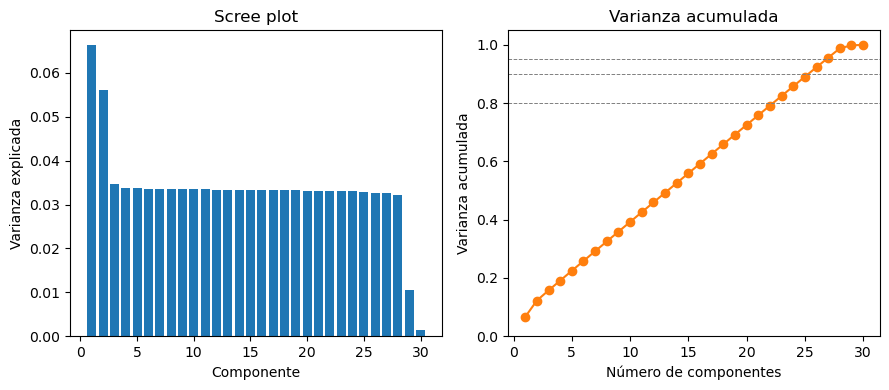

In [15]:
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
plt.bar(range(1, X.shape[1]+1), explained_var, color='C0')
plt.xlabel('Componente')
plt.ylabel('Varianza explicada')
plt.title('Scree plot')

plt.subplot(1,2,2)
plt.plot(range(1, X.shape[1]+1), cum_explained, marker='o', color='C1')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada')
plt.ylim(0,1.05)
for thr in (0.80,0.90,0.95):
    plt.axhline(thr, color='grey', ls='--', lw=0.7)
plt.title('Varianza acumulada')
plt.tight_layout()
plt.show()

Para validar la hipótesis de que el dataset ya ha sido sometido a una reducción de dimensionalidad —y que por tanto no sería viable aplicar una nueva sin pérdida significativa de información—, se ha realizado un Análisis de Componentes Principales (PCA) sobre las variables numéricas (Time, Amount y V1 a V28), generando 30 componentes.

El scree plot muestra una caída inicial leve en los dos primeros componentes, que explican individualmente solo entre un 6 % y 7 % de la varianza. A partir del tercer componente, la varianza explicada se estabiliza en torno al 3 %, sin que exista un punto de inflexión claro que justifique una reducción drástica del número de variables.

Además, el gráfico de varianza acumulada indica que se requieren 26 componentes para capturar el 90 % de la varianza, 27 para alcanzar el 95 % y 29 de 30 para cubrir el 99 %. Esto confirma que la información está muy repartida entre las variables, y que no existe un subconjunto reducido de componentes que concentre suficiente varianza como para permitir una simplificación sin pérdidas relevantes.

En consecuencia, se valida la hipótesis inicial: los datos ya han sido transformados mediante un PCA previo, y no es recomendable aplicar una segunda reducción de dimensionalidad, ya que el espacio actual es informativamente denso y equilibrado.

### Análisis Univariable

#### Estadísticas descriptivas

In [16]:
df.describe(percentiles=[0.01, 0.25, 0.50, 0.75, 0.99]).T

count          mean           std         min           1%  \
Time    227845.0  94792.551673  47488.471663    0.000000  2436.440000   
V1      227845.0      0.000916      1.958337  -56.407510    -6.532263   
V2      227845.0     -0.000384      1.656602  -72.715728    -4.950835   
V3      227845.0     -0.000920      1.514545  -48.325589    -3.972351   
V4      227845.0     -0.001458      1.415853   -5.683171    -3.125194   
V5      227845.0      0.000997      1.387667 -113.743307    -3.038484   
V6      227845.0     -0.000613      1.336803  -26.160506    -2.125784   
V7      227845.0      0.001090      1.243493  -43.557242    -2.984222   
V8      227845.0     -0.000383      1.188643  -73.216718    -4.067128   
V9      227845.0      0.000961      1.097553  -13.320155    -2.457325   
V10     227845.0     -0.001250      1.086659  -24.588262    -2.095121   
V11     227845.0      0.000577      1.021130   -4.797473    -2.088193   
V12     227845.0     -0.001405      1.001724  -18.683715    -3.067474   
V13     227845.0      0.000066      0.995426   -5.791881    -2.283585   
V14     227845.0      0.000004      0.959456  -19.214325    -2.799431   
V15     227845.0      0.000023      0.914004   -4.391307    -2.382610   
V16     227845.0      0.000668      0.877394  -14.129855    -2.388489   
V17     227845.0      0.000616      0.851612  -25.162799    -1.347888   
V18     227845.0     -0.000344      0.838031   -9.498746    -2.141987   
V19     227845.0      0.000113      0.814306   -7.213527    -2.072063   
V20     227845.0      0.000398      0.774045  -54.497720    -1.549386   
V21     227845.0      0.000215      0.732617  -34.830382    -1.472428   
V22     227845.0     -0.001215      0.725311  -10.933144    -1.659712   
V23     227845.0      0.000175      0.627103  -44.807735    -1.192828   
V24     227845.0     -0.000217      0.605446   -2.836627    -1.658291   
V25     227845.0     -0.000979      0.521764  -10.295397    -1.426354   
V26     227845.0     -0.000192      0.482443   -2.604551    -1.009029   
V27     227845.0     -0.000032      0.401821   -9.895244    -1.243090   
V28     227845.0      0.000257      0.329776  -15.430084    -0.868173   
Amount  227845.0     88.479993    254.930277    0.000000     0.120000   
Class   227845.0      0.001729      0.041548    0.000000     0.000000   

                 25%           50%            75%            99%  \
Time    54161.000000  84707.000000  139305.000000  170573.000000   
V1         -0.919918      0.017978       1.315548       2.237259   
V2         -0.597971      0.066050       0.803898       3.789896   
V3         -0.890786      0.179041       1.025399       2.723435   
V4         -0.849270     -0.020959       0.741630       4.250098   
V5         -0.688802     -0.054711       0.611173       3.440903   
V6         -0.768573     -0.274846       0.396056       4.205027   
V7         -0.552156      0.041272       0.570639       2.693050   
V8         -0.208431      0.022233       0.327504       2.061588   
V9         -0.642386     -0.050414       0.599040       2.982107   
V10        -0.536120     -0.094026       0.450669       3.259607   
V11        -0.763311     -0.031764       0.740126       2.292672   
V12        -0.406727      0.139452       0.617962       1.700296   
V13        -0.647707     -0.014114       0.661502       2.515221   
V14        -0.425856      0.051191       0.494204       2.151799   
V15        -0.581592      0.048299       0.648036       1.925084   
V16        -0.467322      0.067910       0.523986       1.875784   
V17        -0.484129     -0.065443       0.400649       2.288683   
V18        -0.498850     -0.004699       0.500715       2.065006   
V19        -0.455756      0.004464       0.458395       2.266407   
V20        -0.211969     -0.062614       0.133017       2.413892   
V21        -0.228730     -0.029639       0.186080       1.931297   
V22        -0.542809      0.005491       0.527408       1.530558   
V23        -0.161296     -0.010595       0

In [17]:
# Calcular moda
df.mode().T

0
Time    163152.000000
V1           1.245674
V2           0.166975
V3           0.488306
V4           0.635322
V5          -0.562777
V6          -1.011073
V7           0.014953
V8          -0.160211
V9           0.170362
V10         -0.044575
V11         -0.356749
V12         -0.073460
V13         -0.517760
V14          0.406969
V15          1.124147
V16          0.342470
V17         -0.374656
V18         -0.438992
V19         -0.116091
V20         -0.132080
V21         -0.262581
V22         -0.816264
V23          0.140304
V24          0.357827
V25          0.186423
V26          0.096544
V27         -0.035866
V28          0.018495
Amount       1.000000
Class        0.000000

In [18]:
# Calcular IQR
df.describe().T["75%"] - df.describe().T["25%"]

Time      85144.000000
V1            2.235466
V2            1.401869
V3            1.916185
V4            1.590900
V5            1.299975
V6            1.164629
V7            1.122795
V8            0.535935
V9            1.241427
V10           0.986789
V11           1.503438
V12           1.024690
V13           1.309209
V14           0.920059
V15           1.229628
V16           0.991308
V17           0.884778
V18           0.999565
V19           0.914151
V20           0.344986
V21           0.414810
V22           1.070217
V23           0.309498
V24           0.794676
V25           0.668288
V26           0.568289
V27           0.162360
V28           0.131444
Amount       71.500000
Class         0.000000
dtype: float64

In [19]:
# Excluir columnas no numéricas y las que no deben analizarse para outliers
cols_numericas = df.select_dtypes(include=[np.number]).columns
cols_excluir = ["Time", "Class"]  
cols_outlier = [col for col in cols_numericas if col not in cols_excluir]

# Función para detectar outliers con IQR
def detectar_outliers_iqr(df, columnas):
    outliers = {}
    for col in columnas:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        limites = (Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)
        outliers[col] = df[(df[col] < limites[0]) | (df[col] > limites[1])][col]
    return outliers

# Detectar outliers
outliers_detectados = detectar_outliers_iqr(df, cols_outlier)

# Ver cuántos outliers hay por columna
outliers_resumen = {col: len(outliers_detectados[col]) for col in outliers_detectados}
print(outliers_resumen)

{'V1': 5658, 'V2': 10824, 'V3': 2683, 'V4': 8910, 'V5': 9848, 'V6': 18410, 'V7': 7139, 'V8': 19249, 'V9': 6606, 'V10': 7662, 'V11': 622, 'V12': 12309, 'V13': 2749, 'V14': 11316, 'V15': 2306, 'V16': 6586, 'V17': 5888, 'V18': 5963, 'V19': 8206, 'V20': 22135, 'V21': 11548, 'V22': 1059, 'V23': 14858, 'V24': 3803, 'V25': 4314, 'V26': 4464, 'V27': 31220, 'V28': 24182, 'Amount': 25553}


El análisis univariable ha permitido identificar la presencia de numerosos valores atípicos en varias variables. Estos outliers se han detectado mediante el rango intercuartílico (IQR), y dado que los modelos pueden verse afectados por estos extremos (especialmente los lineales o sensibles a escala), será necesario tratarlos en el preprocesamiento.

In [20]:
# Calcular rango
df.describe().T["max"] - df.describe().T["min"]

Time      172792.000000
V1            58.862440
V2            94.773457
V3            52.513400
V4            22.558515
V5           148.544973
V6            99.462131
V7           164.146736
V8            93.223927
V9            23.713044
V10           39.833948
V11           16.816387
V12           26.532107
V13           12.918764
V14           29.741092
V15           13.269049
V16           31.444966
V17           34.416326
V18           14.539815
V19           12.805499
V20           93.918625
V21           62.033221
V22           21.436234
V23           67.336147
V24            7.421176
V25           17.814986
V26            6.121896
V27           41.507442
V28           49.277892
Amount     25691.160000
Class          1.000000
dtype: float64

In [21]:
# Almacenar columnas numéricas para evitar error
num_columns = df.describe().columns
num_columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [22]:
# Calcular asimetría
"""
valor > 0 -> distribución asimétrica a la derecha
valor = 0 -> distribución simétrica
valor < 0 -> distribución asimétrica a la izquierda
"""
df[num_columns].skew()

Time      -0.036053
V1        -3.320269
V2        -4.826847
V3        -2.219375
V4         0.677776
V5        -2.928646
V6         1.977725
V7         3.744620
V8        -8.445014
V9         0.543603
V10        1.212102
V11        0.359527
V12       -2.281334
V13        0.067612
V14       -1.992812
V15       -0.308053
V16       -1.113875
V17       -3.975821
V18       -0.266115
V19        0.107289
V20       -1.977859
V21        3.656863
V22       -0.230008
V23       -6.285467
V24       -0.552668
V25       -0.417168
V26        0.579265
V27       -0.038330
V28       11.776522
Amount    18.352356
Class     23.985331
dtype: float64

Valores muy positivos (Asimetría derecha, colas largas a la derecha)
Los valores V28 con 11.77, amount con 18.35, class con 23.98 estan fuertemente sesgadas a la derecha.
Los valores V7 con 3.74 y v21 con 3.65 tambien tienen un sesgo derecho significativo.
Los valores V8 con -8.44, V23 con -6.28, V2 con -4.82, V17 con -3.97 y v1 estan fuertemente sesgadas a la izquierda.

Esto indica que hay outliers hacia la derecha e izquierda por lo que igual es necesario realizar transofrmaciones para normalizar.

Existen también asimetrías moderadas como V6 con 1.97, V10 con 1.21, V4 con 0.67, V9 con 0.54 y V26 con 0.57
Y respecto a las asimetrías moderadas negativas se encuentran V5 con -2.92, V12 con -2.28, V14 con -1.99, V20 con -1.97, V16 con -1.11

Muestra que aunque están sesgadas no de manera extrema y podrían estar influenciadas por valores atípicos.

Tambien existen distribuciones aproximadamente simétricas como Time con -0.03, V13 con 0.06, V19 con 0.10, V27 con -0.03 
Y negativas V15 con -0.30, V18 con -0.26, V22 con -0.23, V25 con -0.41, V24 con -0.55

In [23]:
# Calcular la curtosis
"""
valor > 0 -> distribución leptocúrtica
valor = 0 -> distribución mesocúrtica
valor < 0 -> distribución platicúrtica
"""

df[num_columns].kurt()

Time        -1.293898
V1          33.702684
V2         101.559766
V3          26.367787
V4           2.663545
V5         246.163406
V6          50.768538
V7         476.357336
V8         221.096918
V9           3.472585
V10         29.894768
V11          1.618018
V12         20.110105
V13          0.201966
V14         23.452271
V15          0.304367
V16         10.891255
V17         98.548296
V18          2.686420
V19          1.731381
V20        304.641848
V21        202.879141
V22          2.778882
V23        452.759045
V24          0.616863
V25          4.301030
V26          0.935295
V27        248.711619
V28       1016.642789
Amount     952.760129
Class      573.301141
dtype: float64

Variables con valores extremos como V28 con 1016.64, V23 con 452.76 y V20 con 304.64 parecen tener curtosis alta indicando que hay valores atípicos significativos o que la distribución tiene colas pesadas.

Variables con valores más bajos y cercanos entre sí, como V13 con 0.20, V15 con 0.30 o V24 con 0.61 pueden tener curtosis baja o negativa lo que sugiere distribuciones más achatadas.

#### Visualizaciones

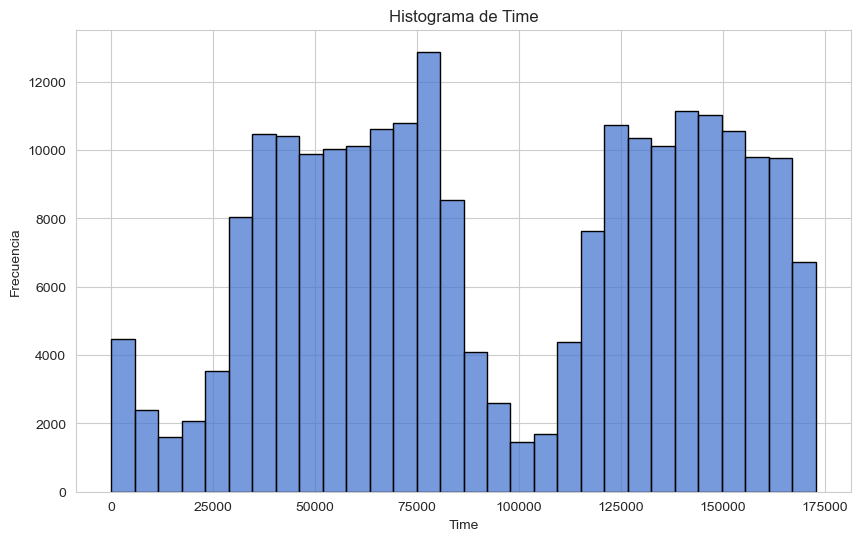

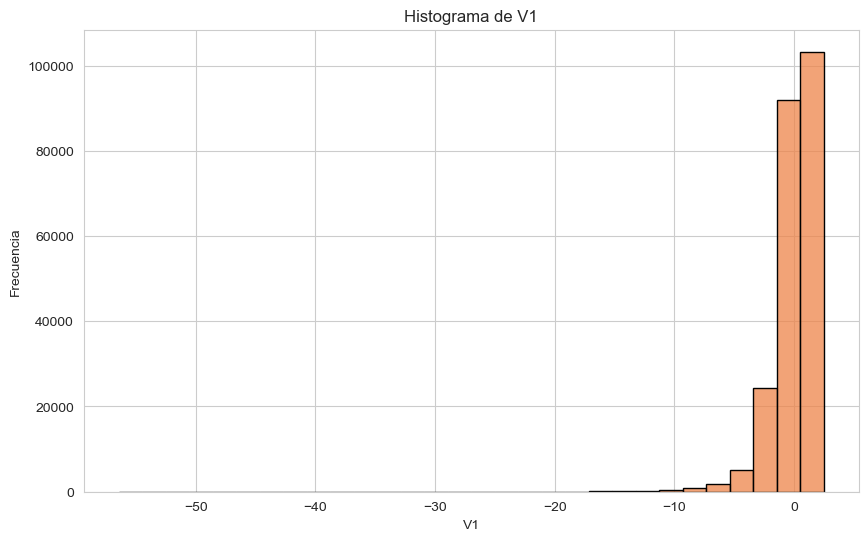

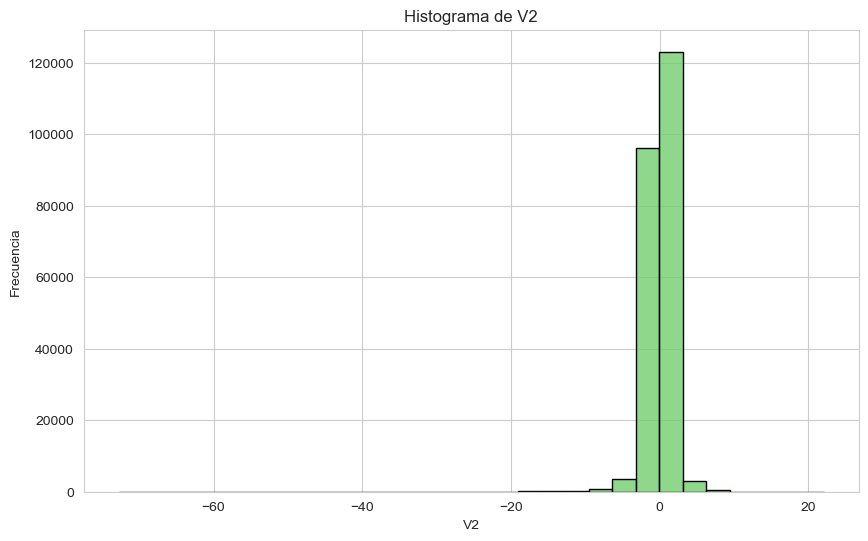

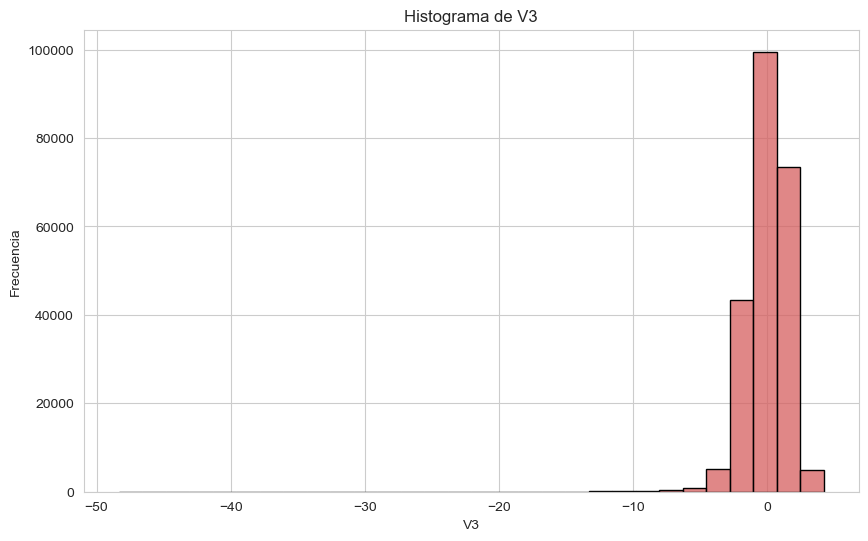

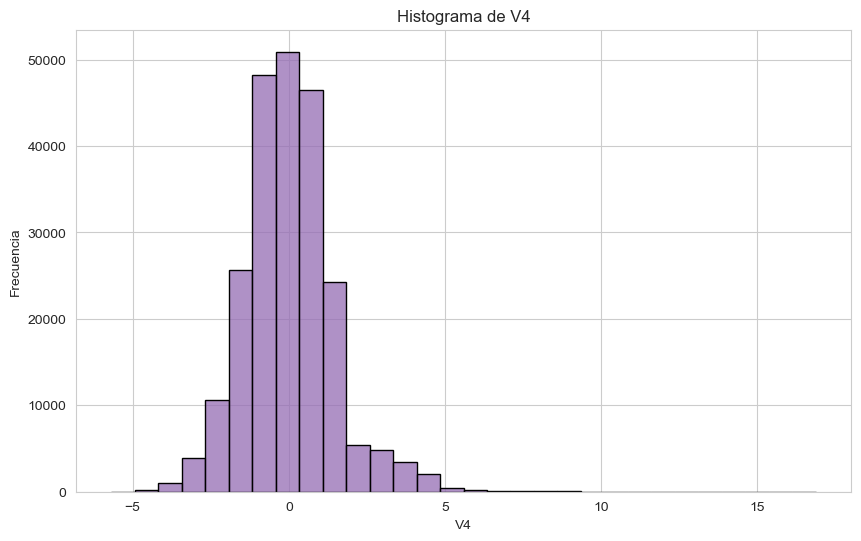

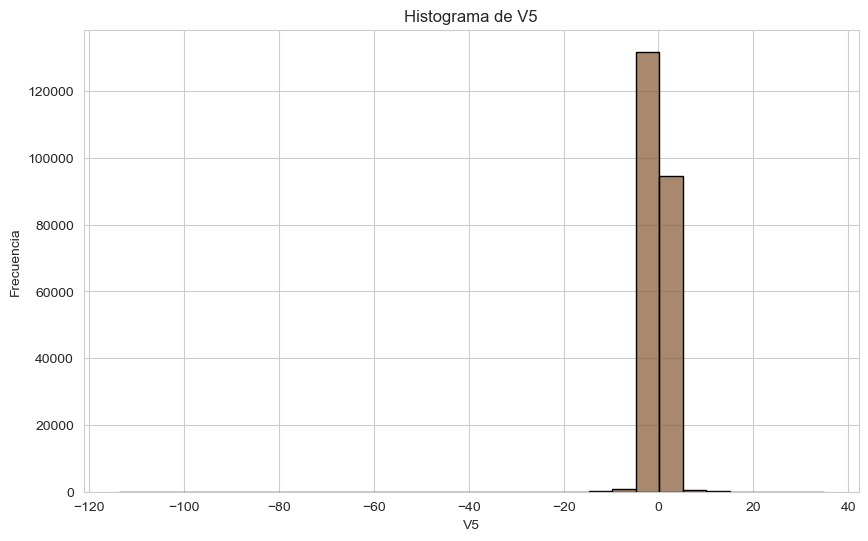

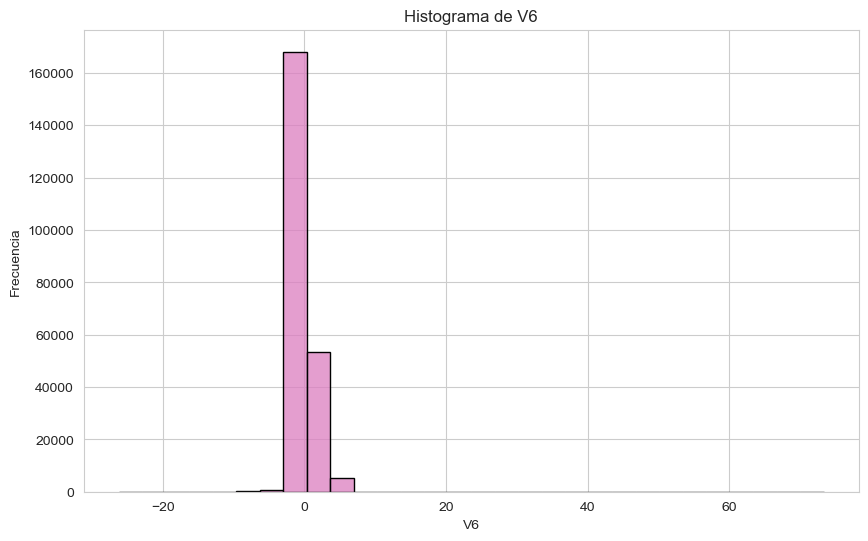

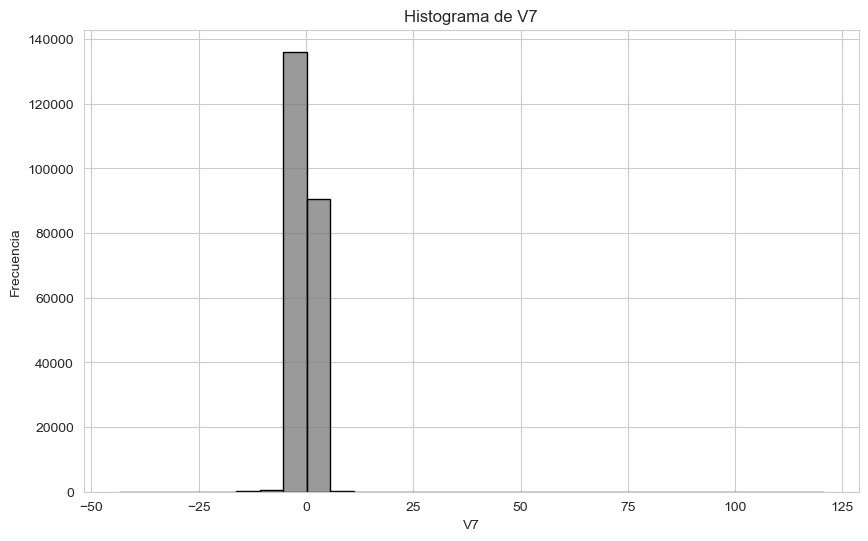

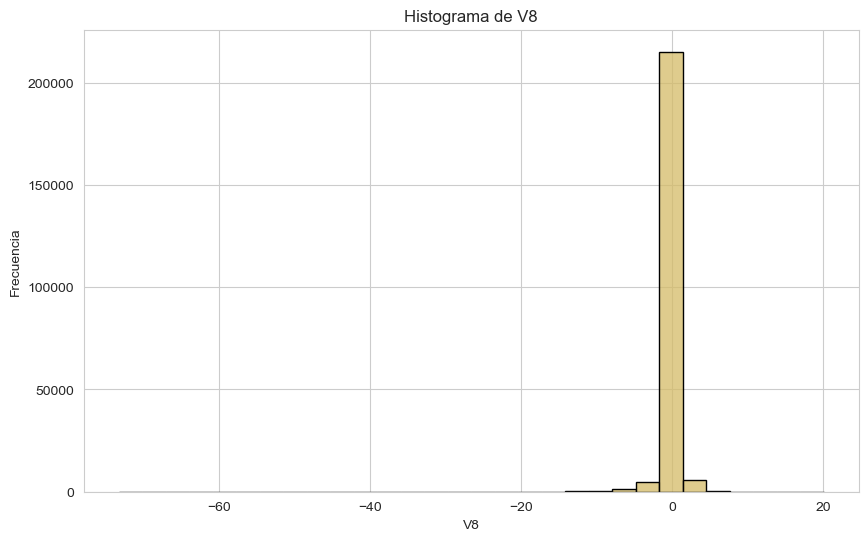

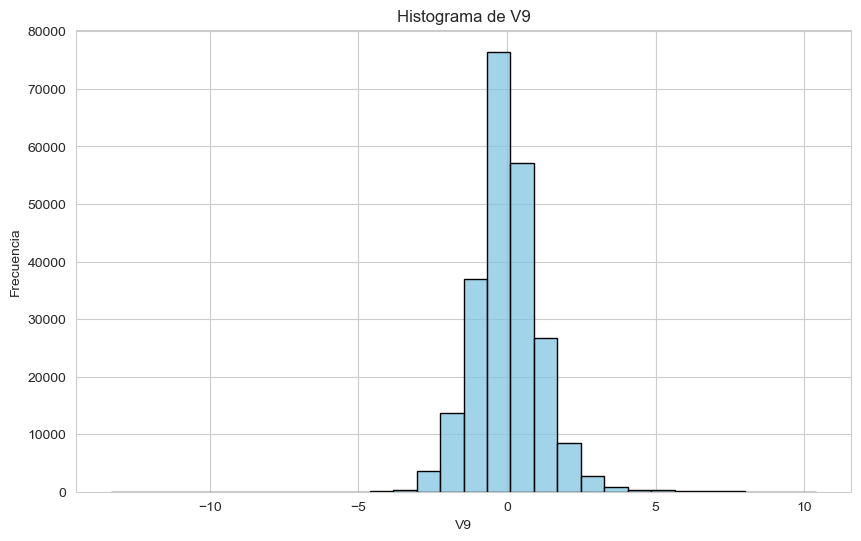

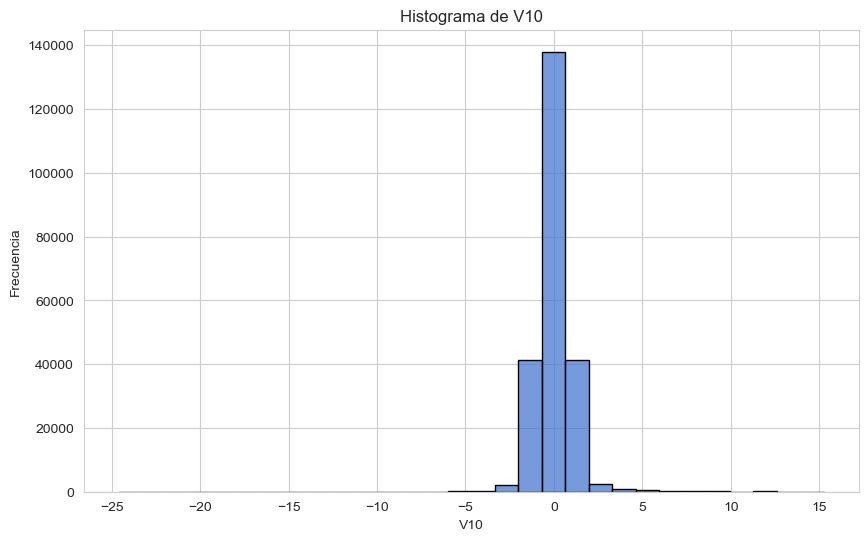

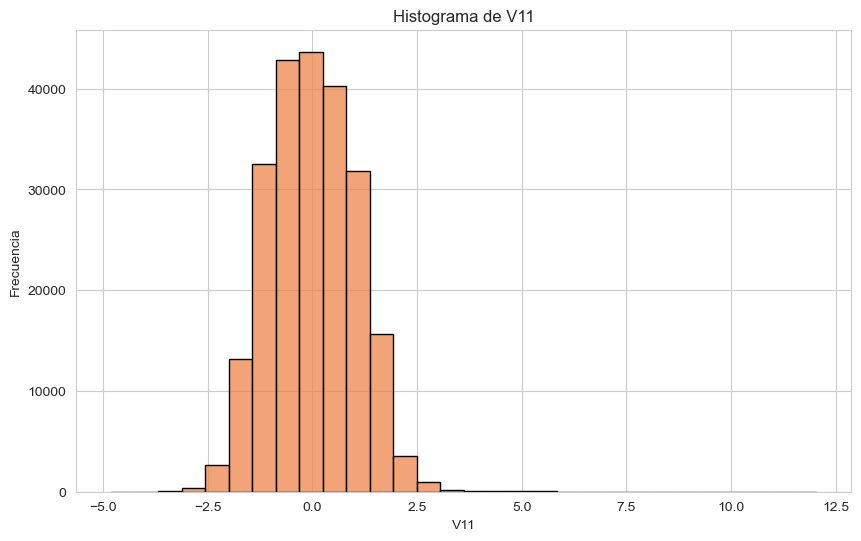

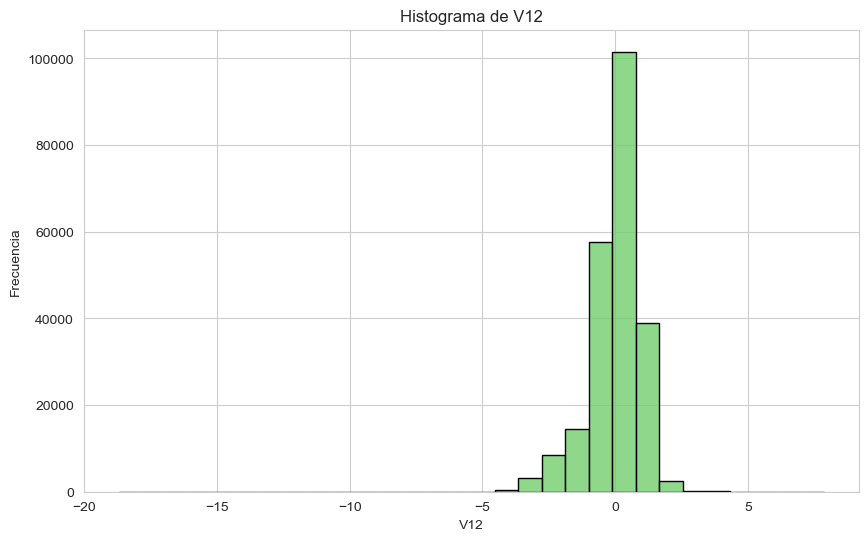

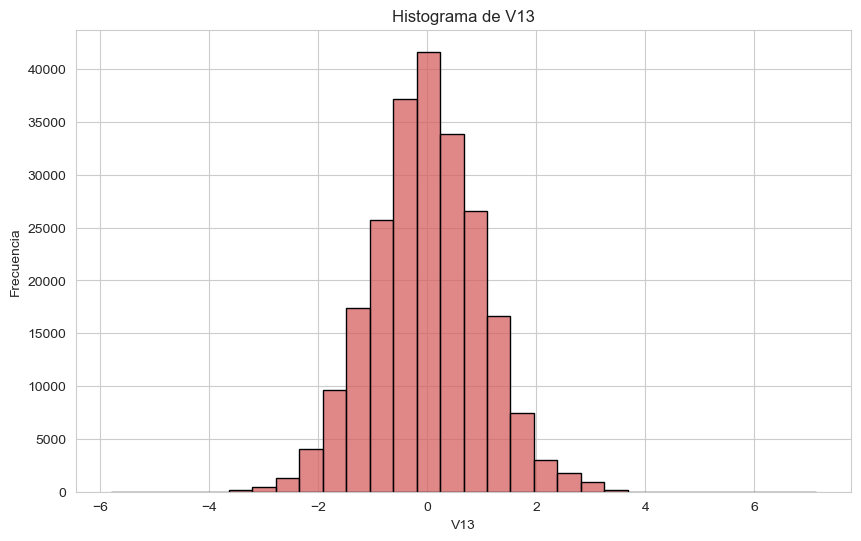

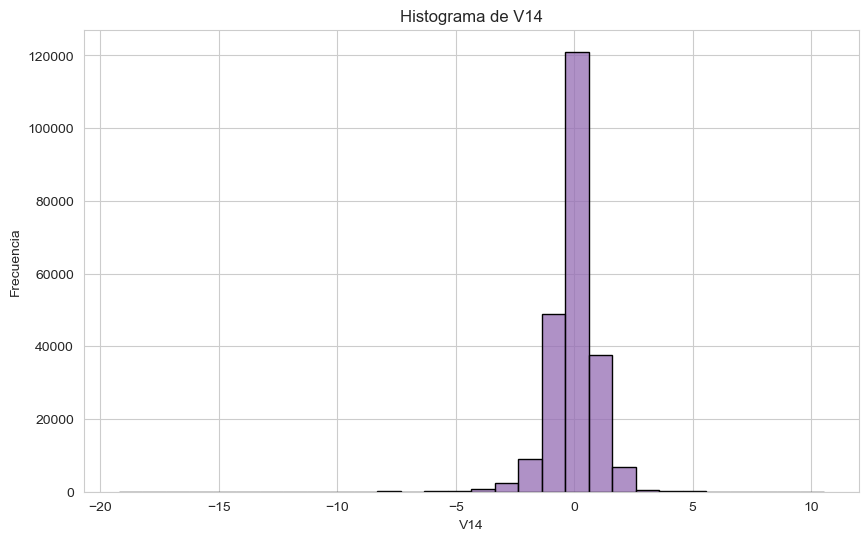

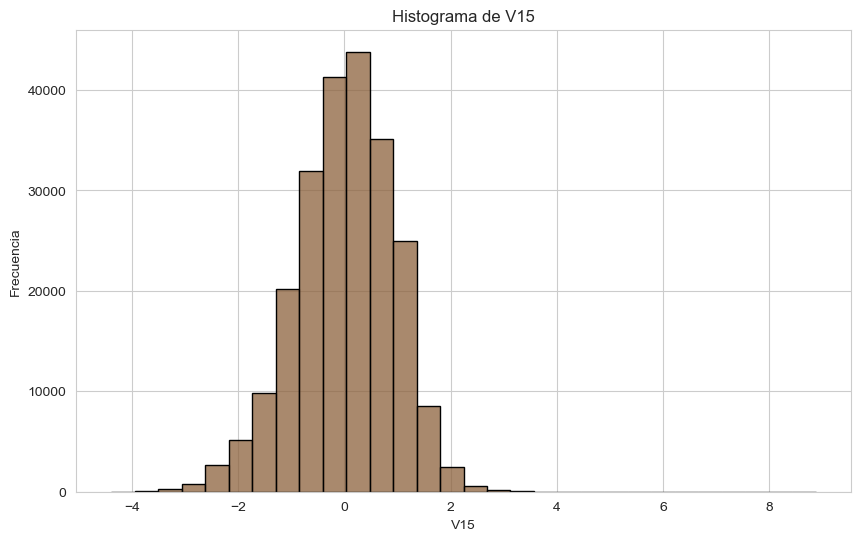

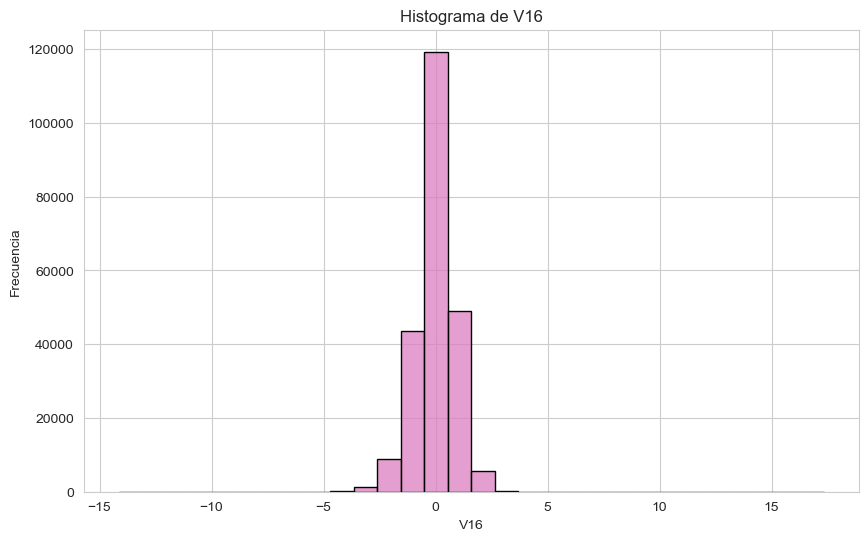

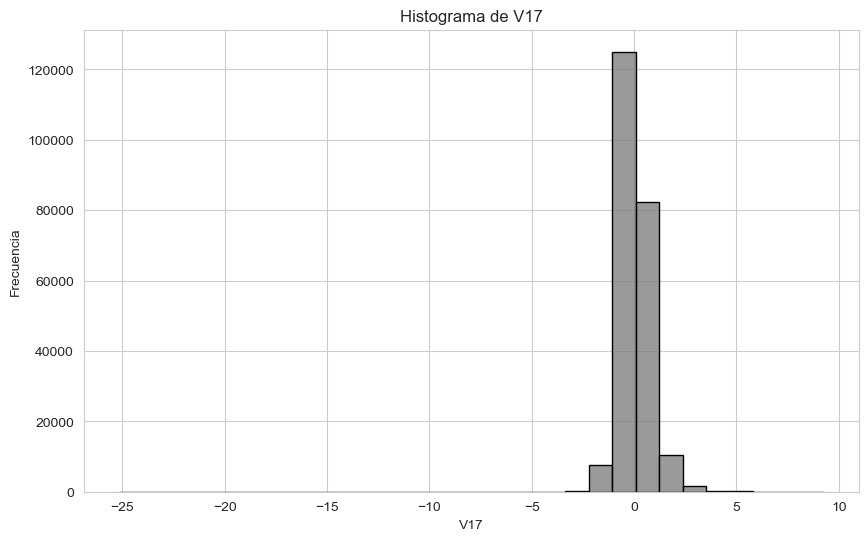

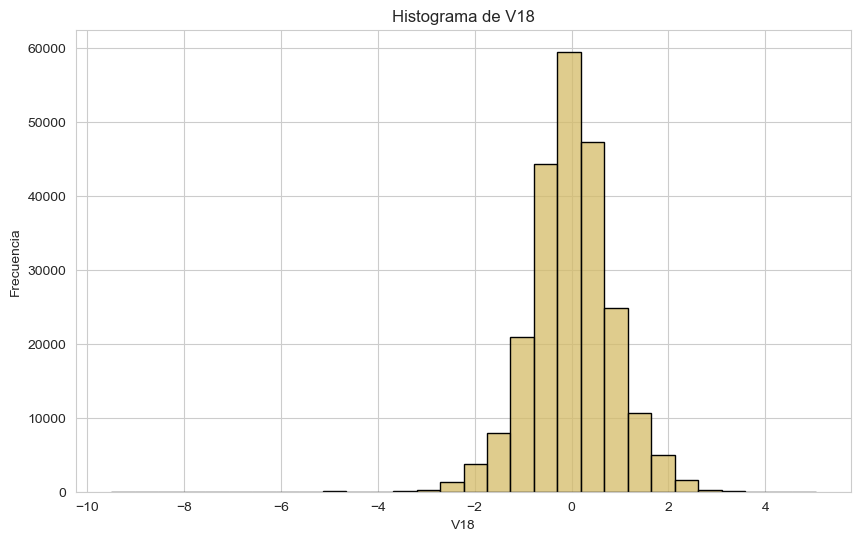

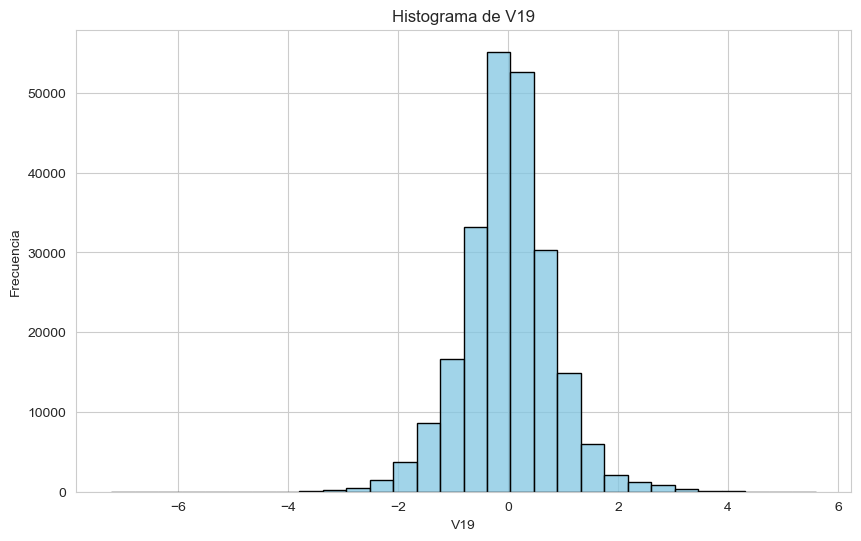

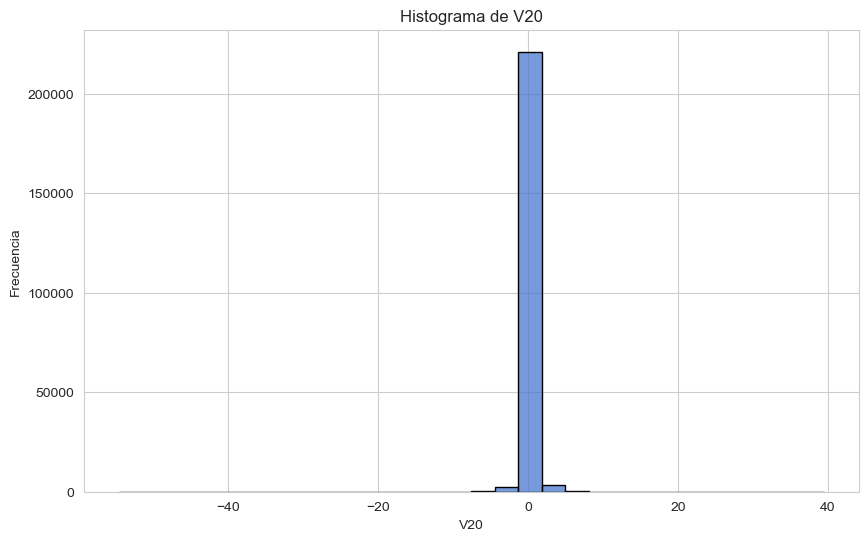

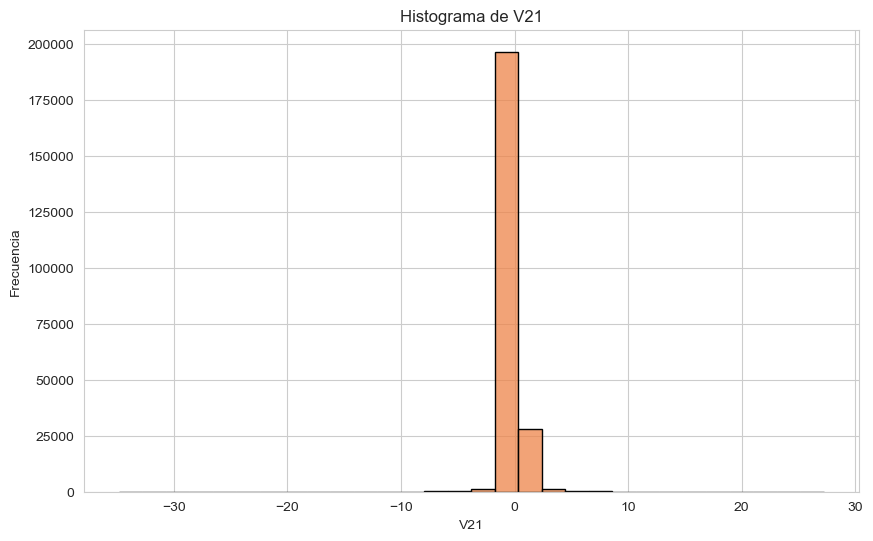

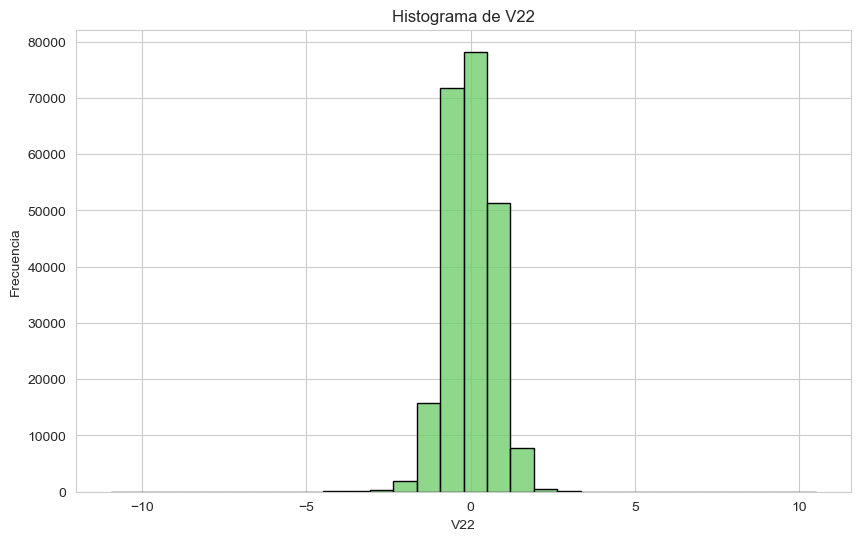

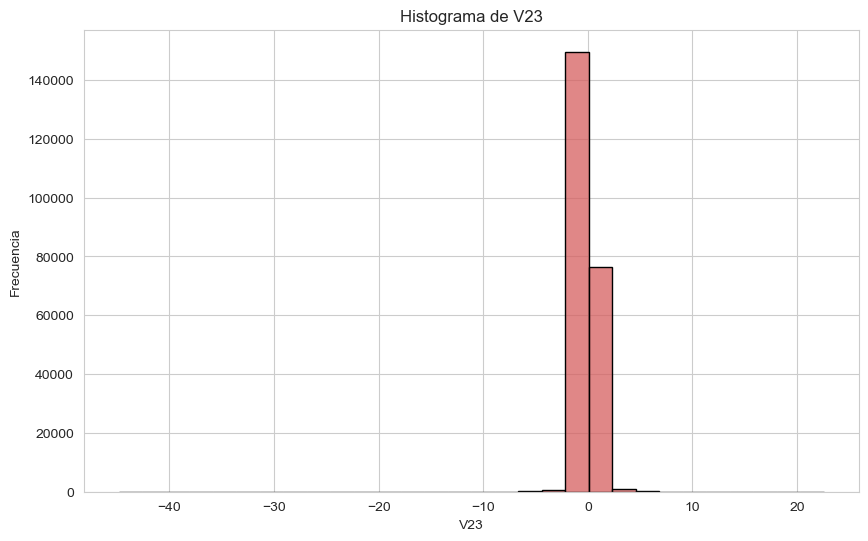

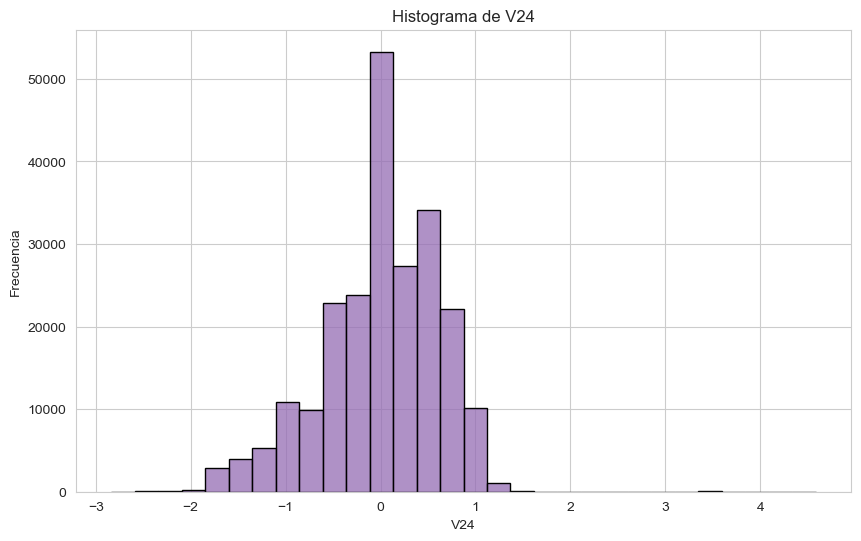

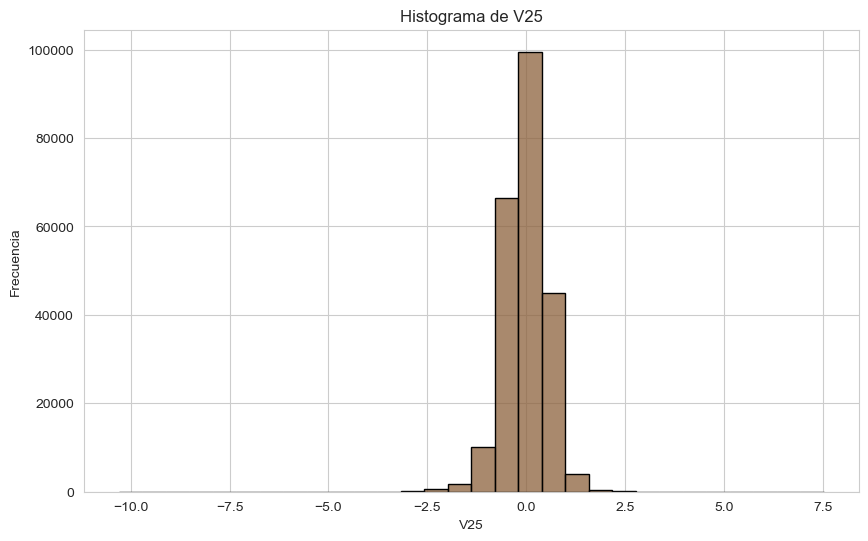

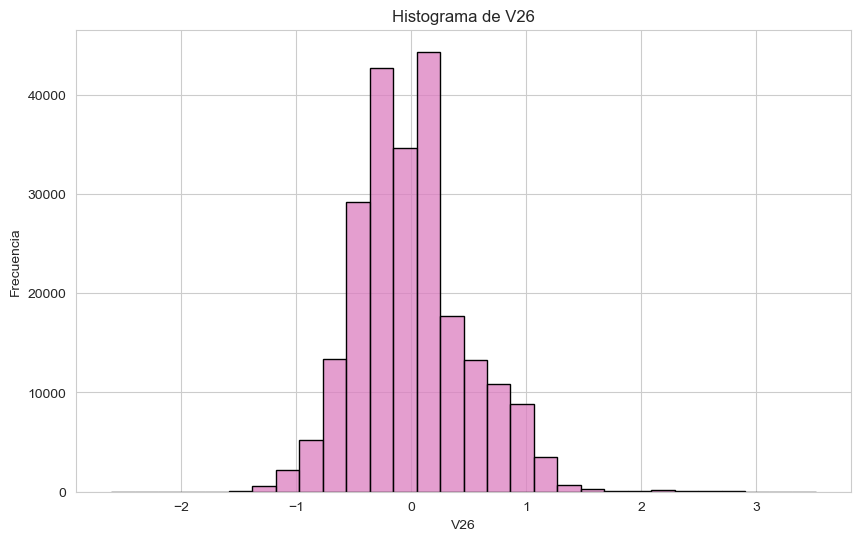

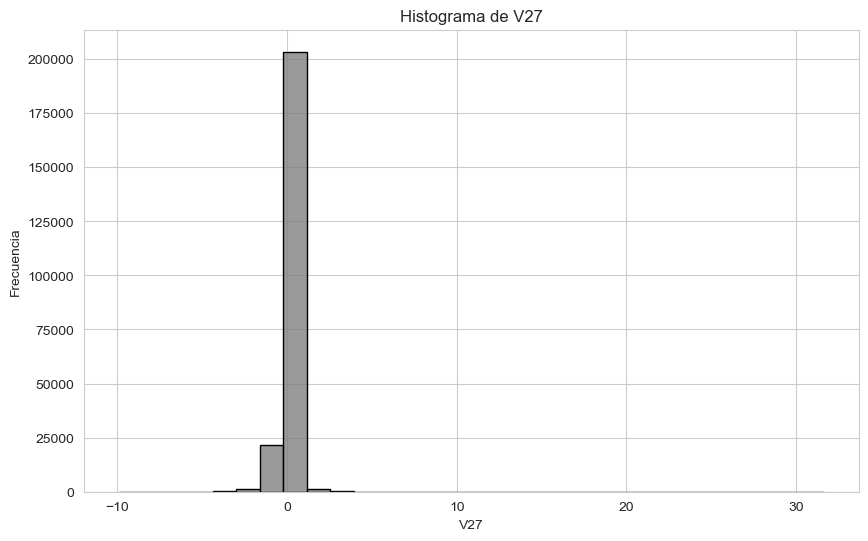

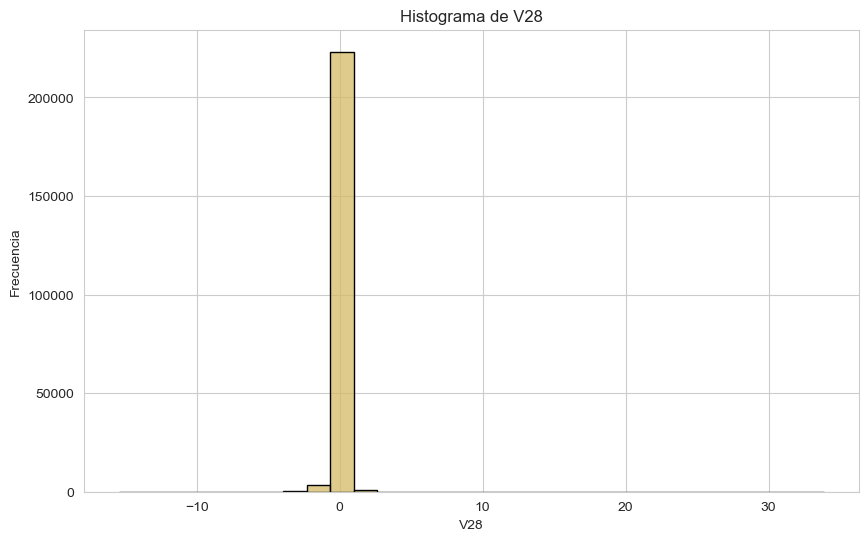

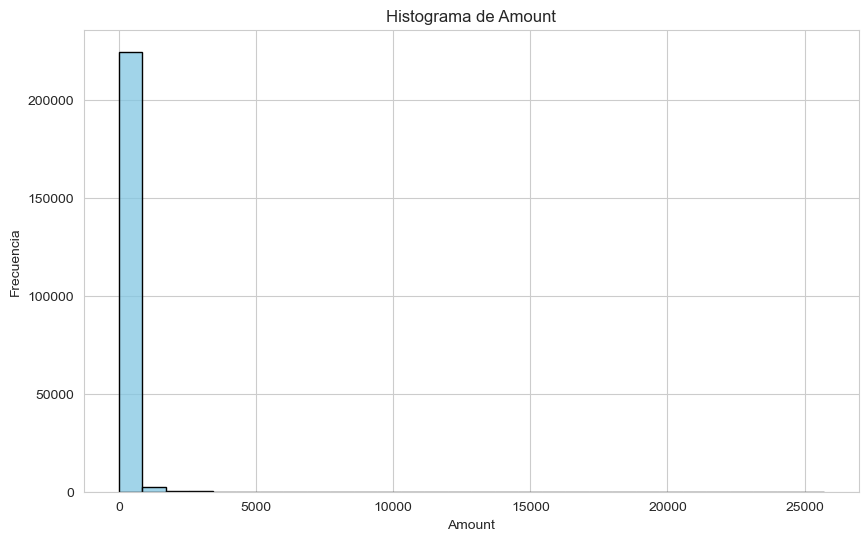

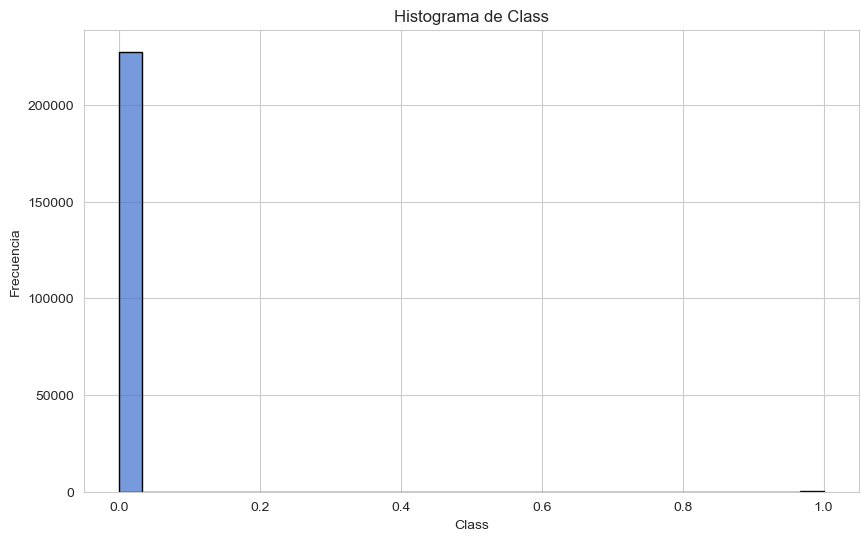

In [24]:
sns.set_style("whitegrid")
palette = sns.color_palette("muted")

# Iterar cada columna del DataFrame
for i, column in enumerate(df.columns):
    plt.figure(figsize=(10, 6))
    color = palette[i % len(palette)]  # Asigna colores de forma cíclica

    # Comprobación de si la columna es numérica
    if pd.api.types.is_numeric_dtype(df[column]):
        sns.histplot(df[column].dropna(), bins=30, color=color, edgecolor='black')
        plt.title(f'Histograma de {column}')
        plt.xlabel(column)
        plt.ylabel('Frecuencia')

    # Comprobación de si la columna es categórica
    elif isinstance(df[column].dtype, pd.CategoricalDtype) or df[column].dtype == 'object':
        sns.countplot(x=df[column], color=color, edgecolor='black')
        plt.title(f'Bar Chart de {column}')
        plt.xlabel(column)
        plt.ylabel('Total')
        plt.xticks(rotation=45)  # Rota etiquetas si son largas

    plt.show()

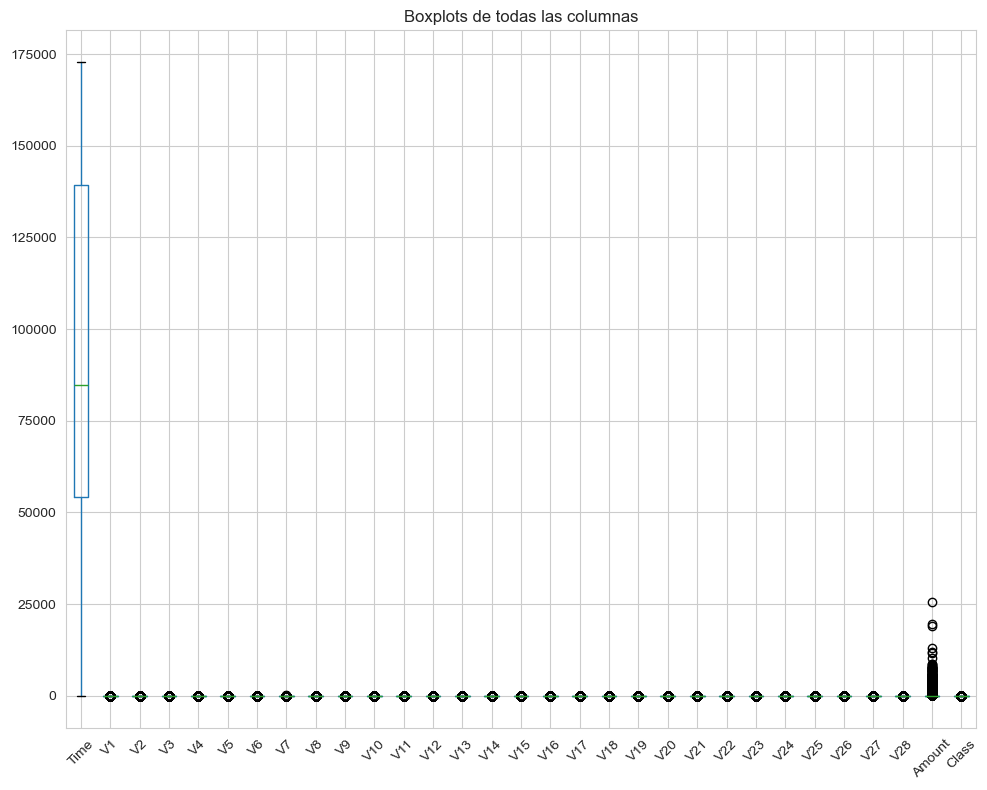

In [25]:
# Genera boxplots para cada columna numérica del DataFrame
df.boxplot(figsize=(10, 8), rot=45)
plt.title('Boxplots de todas las columnas')
plt.tight_layout()  # Para ajustar mejor el espacio de la gráfica
plt.show()

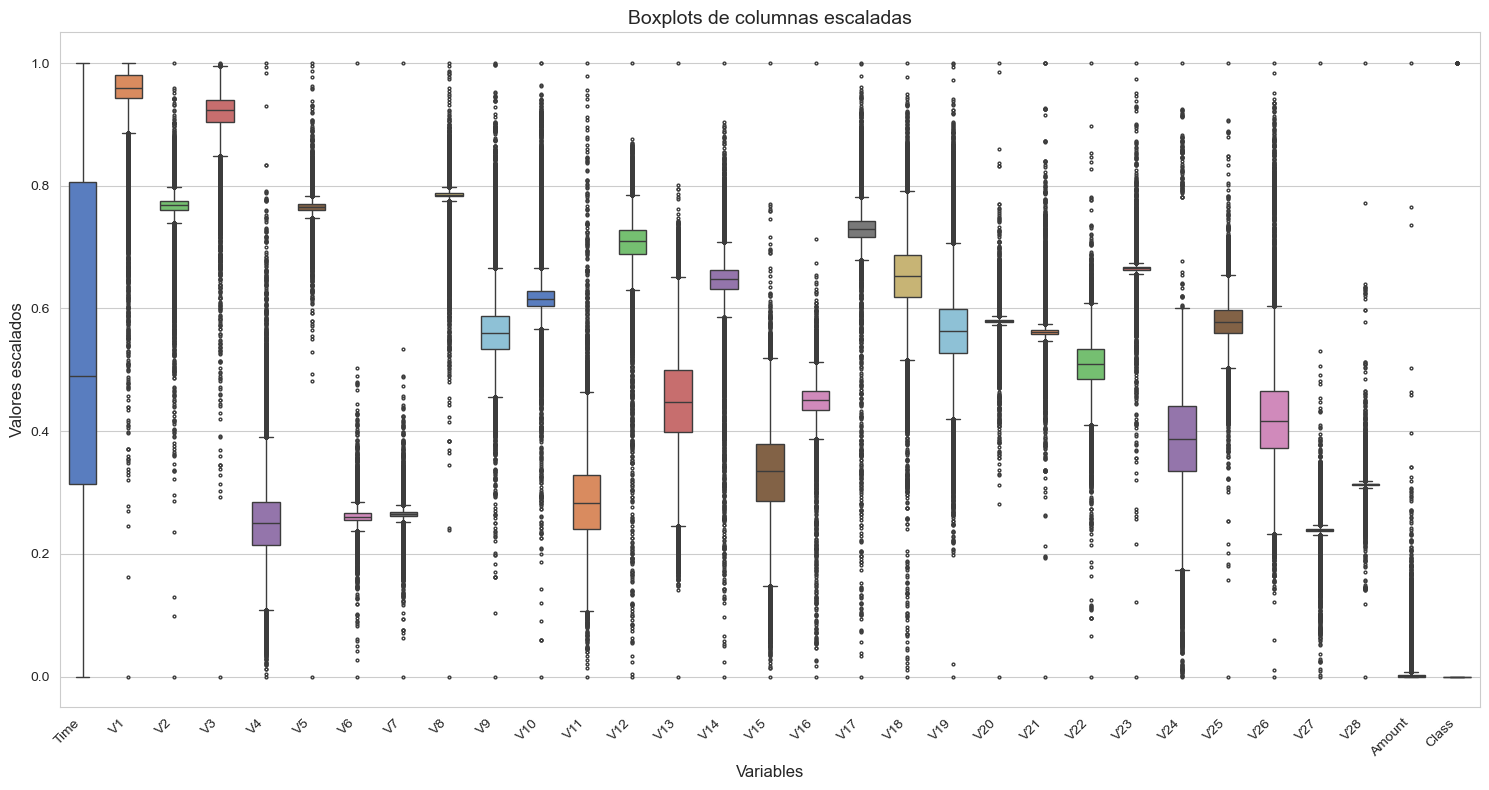

In [26]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Configuración de estilo
sns.set_style("whitegrid")

# Seleccionamos solo las columnas numéricas
numeric_columns = df.select_dtypes(include=['float', 'int']).columns
df_numeric = df[numeric_columns]

# Normalizamos los datos entre 0 y 1
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=numeric_columns)

# Aumentar el tamaño del gráfico
plt.figure(figsize=(15, 8))

# Crear boxplots con Seaborn
sns.boxplot(data=df_scaled, palette="muted", width=0.6, flierprops={"marker": "o", "markersize": 2})

# Etiquetas y título
plt.xticks(rotation=45, ha="right")
plt.title('Boxplots de columnas escaladas', fontsize=14)
plt.xlabel("Variables", fontsize=12)
plt.ylabel("Valores escalados", fontsize=12)

plt.tight_layout()
plt.show()

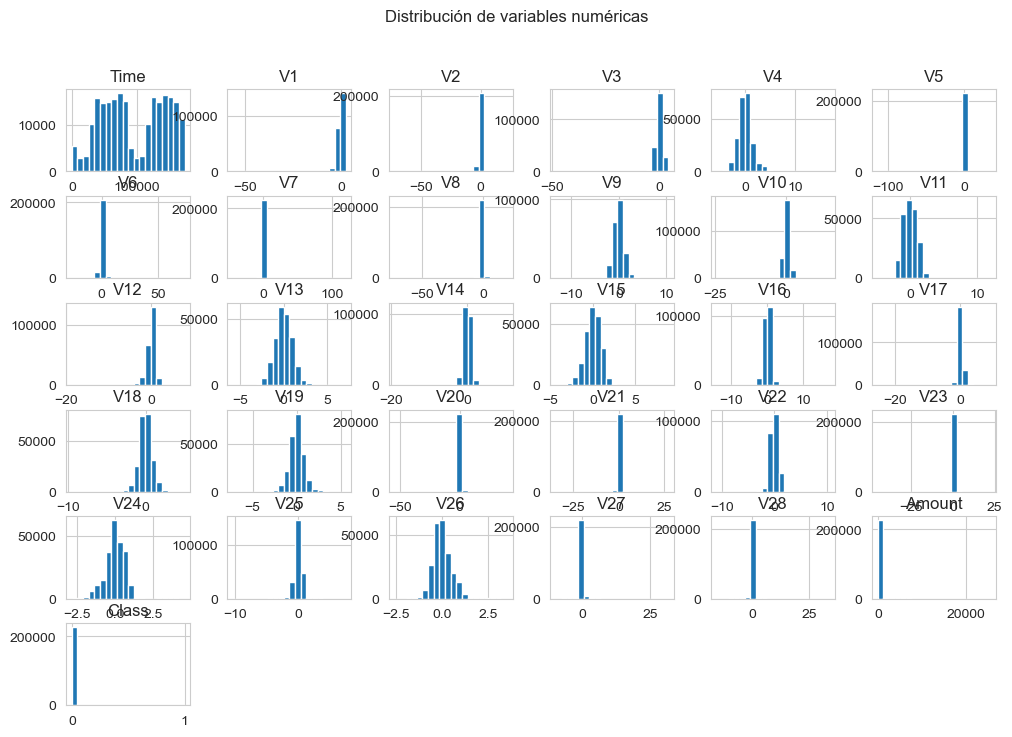

In [27]:
# Histograma de variables numéricas
df.hist(figsize=(12, 8), bins=20)
plt.suptitle("Distribución de variables numéricas")
plt.show()

In [28]:
# Solo mostrar Amount y Time con sus transformaciones
df_subset = df[["Amount", "Time"]].copy()

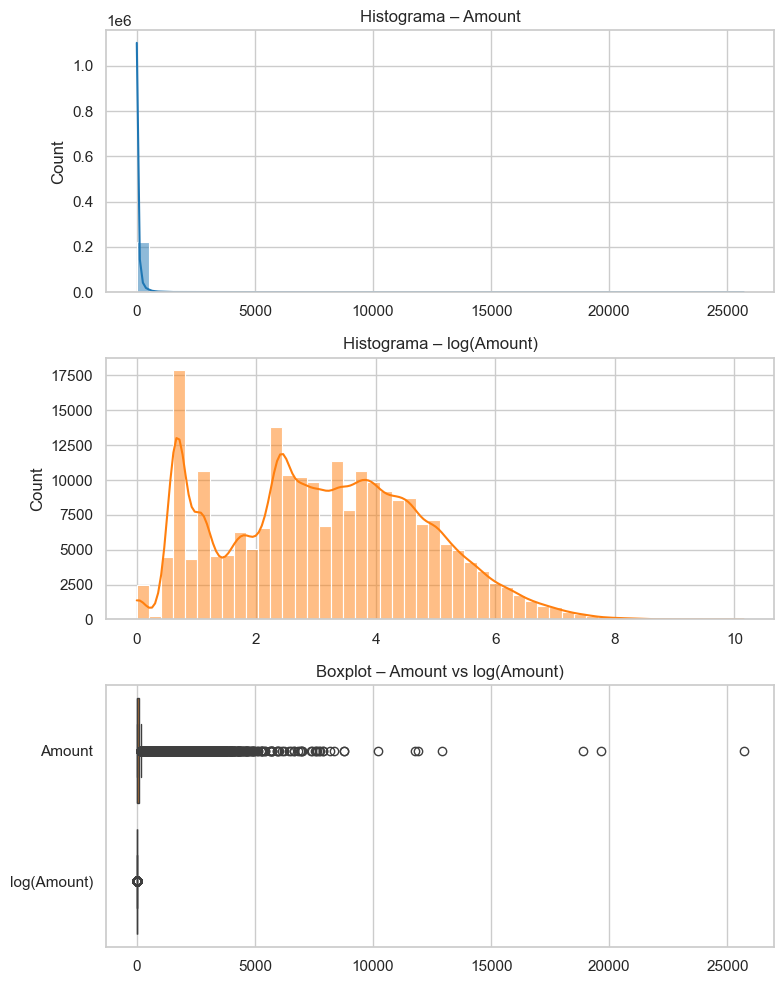

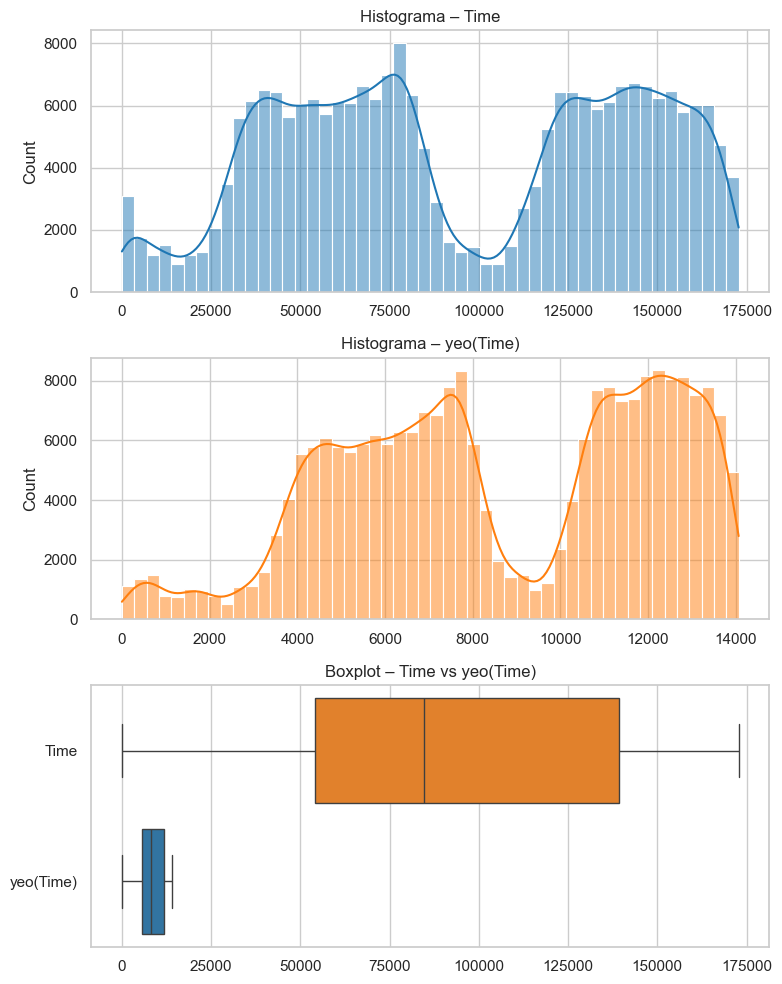

In [29]:
transformaciones = {
    "Amount": "log",
    "Time": "yeo",
}

sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.0)

analisis_univariado_numerico(
    df=df_subset,
    transform_cols=transformaciones,
    bins=50
)


**Recomendaciones:**

Amount (log1p): Reduce sesgo, homogeneiza la varianza, mejora la robustez frente a outliers. Recomendable aplicarla a la hora de llevar a cabo predicciones.

Time (yeo-johnson): La forma bimodal persiste; la transformación no añade información y puede confundir la interpretación temporal. No es por tanto recomendable aplicarla.



## Analisis bivariado

In [30]:
num_columns = df.select_dtypes(include=[np.number]).columns

c:\Users\isma_\Desktop\Machine_Learning_Reto_2\utils.py:53: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
c:\Users\isma_\Desktop\Machine_Learning_Reto_2\utils.py:53: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
c:\Users\isma_\miniconda3\envs\proyectoml\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\isma_\Desktop\Machine_Learning_Reto_2\utils.py:90: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


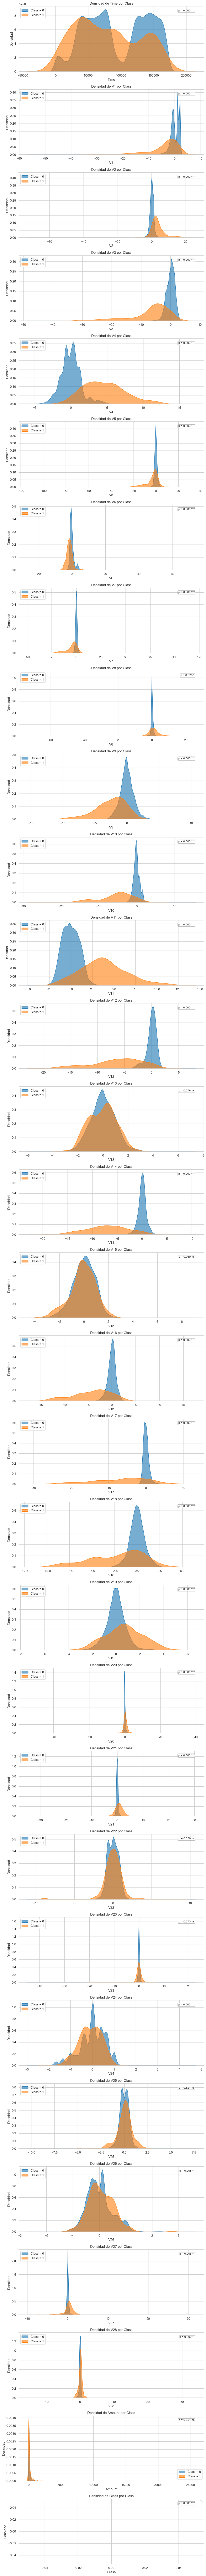

In [31]:
plot_density_with_ttest(df, num_columns, target="Class", figsize=(10, 4))


#### Comentarios:
El análisis bivariado ha permitido identificar qué variables numéricas presentan una mayor capacidad para discriminar entre transacciones fraudulentas y no fraudulentas. Algunas variables como V4 y V11 muestran distribuciones claramente diferenciadas por clase, siendo especialmente relevantes ya que los fraudes tienden a concentrarse en intervalos específicos.

En cambio,otras variables presentan cierta separación entre clases, aunque con solapamiento significativo, por lo que podrían ser útiles en combinación con otras variables. Por otra parte, Las pruebas t-test realizadas para cada variable confirman que varias de ellas presentan diferencias estadísticamente significativas entre clases, reforzando su utilidad para modelos supervisados.

### Análisis Multivariable

In [32]:
#NO EJECUTAR A NO SER QUE SEA UNA EMERGENCIA TARDA MUCHO
#sns.pairplot(df);

In [33]:
# Correlaciones
df[num_columns].corr()

Time        V1        V2        V3        V4        V5        V6  \
Time    1.000000  0.117203 -0.010844 -0.421238 -0.104487  0.171204 -0.063108   
V1      0.117203  1.000000  0.007295 -0.000782 -0.000227  0.001902 -0.003035   
V2     -0.010844  0.007295  1.000000  0.008112 -0.003559  0.008695 -0.003240   
V3     -0.421238 -0.000782  0.008112  1.000000 -0.001850  0.002671 -0.004517   
V4     -0.104487 -0.000227 -0.003559 -0.001850  1.000000 -0.002312  0.002631   
V5      0.171204  0.001902  0.008695  0.002671 -0.002312  1.000000 -0.008561   
V6     -0.063108 -0.003035 -0.003240 -0.004517  0.002631 -0.008561  1.000000   
V7      0.083313 -0.011855 -0.005729 -0.014211  0.005144 -0.020789  0.010363   
V8     -0.038743  0.000546  0.001479  0.002246 -0.000180  0.003117 -0.001161   
V9     -0.010310 -0.001120 -0.000090 -0.001977  0.000379 -0.001800  0.000045   
V10     0.029694 -0.001860  0.004352 -0.000745  0.000909 -0.001075  0.000081   
V11    -0.247385 -0.000448 -0.001157  0.000983  0.002178 -0.001301  0.000622   
V12     0.125590 -0.001497 -0.000544 -0.000075 -0.001699 -0.000569  0.000067   
V13    -0.066410 -0.001924 -0.001757 -0.001095 -0.000702 -0.000614 -0.000054   
V14    -0.098385  0.000033 -0.001041  0.000494 -0.000707  0.000905  0.000656   
V15    -0.183030 -0.001857  0.000280 -0.001326  0.001253 -0.001777  0.001112   
V16     0.012980 -0.002791  0.000076 -0.001699  0.000616 -0.002415  0.002639   
V17    -0.071968 -0.001581  0.000843 -0.000341  0.000288  0.000645 -0.000140   
V18     0.091128 -0.000757  0.000502 -0.001566  0.001995  0.000903  0.000657   
V19     0.029596  0.001869  0.001993  0.001622 -0.001183 -0.001521  0.000371   
V20    -0.051246 -0.001306 -0.004863  0.001906  0.000714  0.005301 -0.002250   
V21     0.045097 -0.001346  0.002492 -0.000554  0.001492  0.001764 -0.001328   
V22     0.144891  0.003286  0.001870  0.000905  0.000647 -0.000594 -0.000003   
V23     0.050655  0.005771  0.004074  0.004907 -0.002682  0.001927 -0.001865   
V24    -0.015464 -0.001356 -0.000414 -0.000579 -0.000989 -0.001035  0.000782   
V25    -0.232573  0.001797  0.001938  0.000258 -0.001542 -0.000433  0.000644   
V26    -0.042594 -0.000779  0.000773 -0.000720  0.001766 -0.000076 -0.000277   
V27    -0.005570 -0.002175 -0.000278 -0.003023  0.001041 -0.008595  0.004883   
V28    -0.009371 -0.003073 -0.004816  0.002885  0.002495  0.008496 -0.005313   
Amount -0.009936 -0.233925 -0.536033 -0.218054  0.103808 -0.394113  0.221781   
Class  -0.013347 -0.095316  0.089084 -0.188841  0.134112 -0.089921 -0.044696   

              V7        V8        V9  ...       V21       V22       V23  \
Time    0.083313 -0.038743 -0.010310  ...  0.045097  0.144891  0.050655   
V1     -0.011855  0.000546 -0.001120  ... -0.001346  0.003286  0.005771   
V2     -0.005729  0.001479 -0.000090  ...  0.002492  0.001870  0.004074   
V3     -0.014211  0.002246 -0.001977  ... -0.000554  0.000905  0.004907   
V4      0.005144 -0.000180  0.000379  ...  0.001492  0.000647 -0.002682   
V5     -0.020789  0.003117 -0.001800  ...  0.001764 -0.000594  0.001927   
V6      0.010363 -0.001161  0.000045  ... -0.001328 -0.000003 -0.001865   
V7      1.000000 -0.006947 -0.005432  ... -0.008404  0.000382  0.000138   
V8     -0.006947  1.000000  0.000543  ... -0.006436  0.003748  0.002578   
V9     -0.005432  0.000543  1.000000  ... -0.002153 -0.000071 -0.001326   
V10    -0.011277 -0.002305 -0.003254  ... -0.004961  0.000903  0.001489   
V11    -0.000509  0.003022  0.001013  ... -0.001153 -0.001621 -0.001210   
V12    -0.001953 -0.003543  0.000900  ...  0.000408 -0.000949  0.000710   
V13     0.001543 -0.000758  0.001403  ... -0.001947 -0.000348 -0.000104   
V14     0.001256 -0.002559  0.003660  ...  0.001151 -0.000457  0.001326   
V15     0.002246 -0.000156 -0.000132  ... -0.002066 -0.002099 -0.001994   
V16     0.005372 -0.004141  0.000095  ... -0.001976  0.000213 -0.002154   
V17    -0.002626 -0.004677  0.000932  ... -0.001076  0.000965  0.000836   
V18     0.000283 -0.002673

In [34]:
# Defino un cmap para ver más claramente los colores
cmap = sns.diverging_palette(500, 10, as_cmap=True)

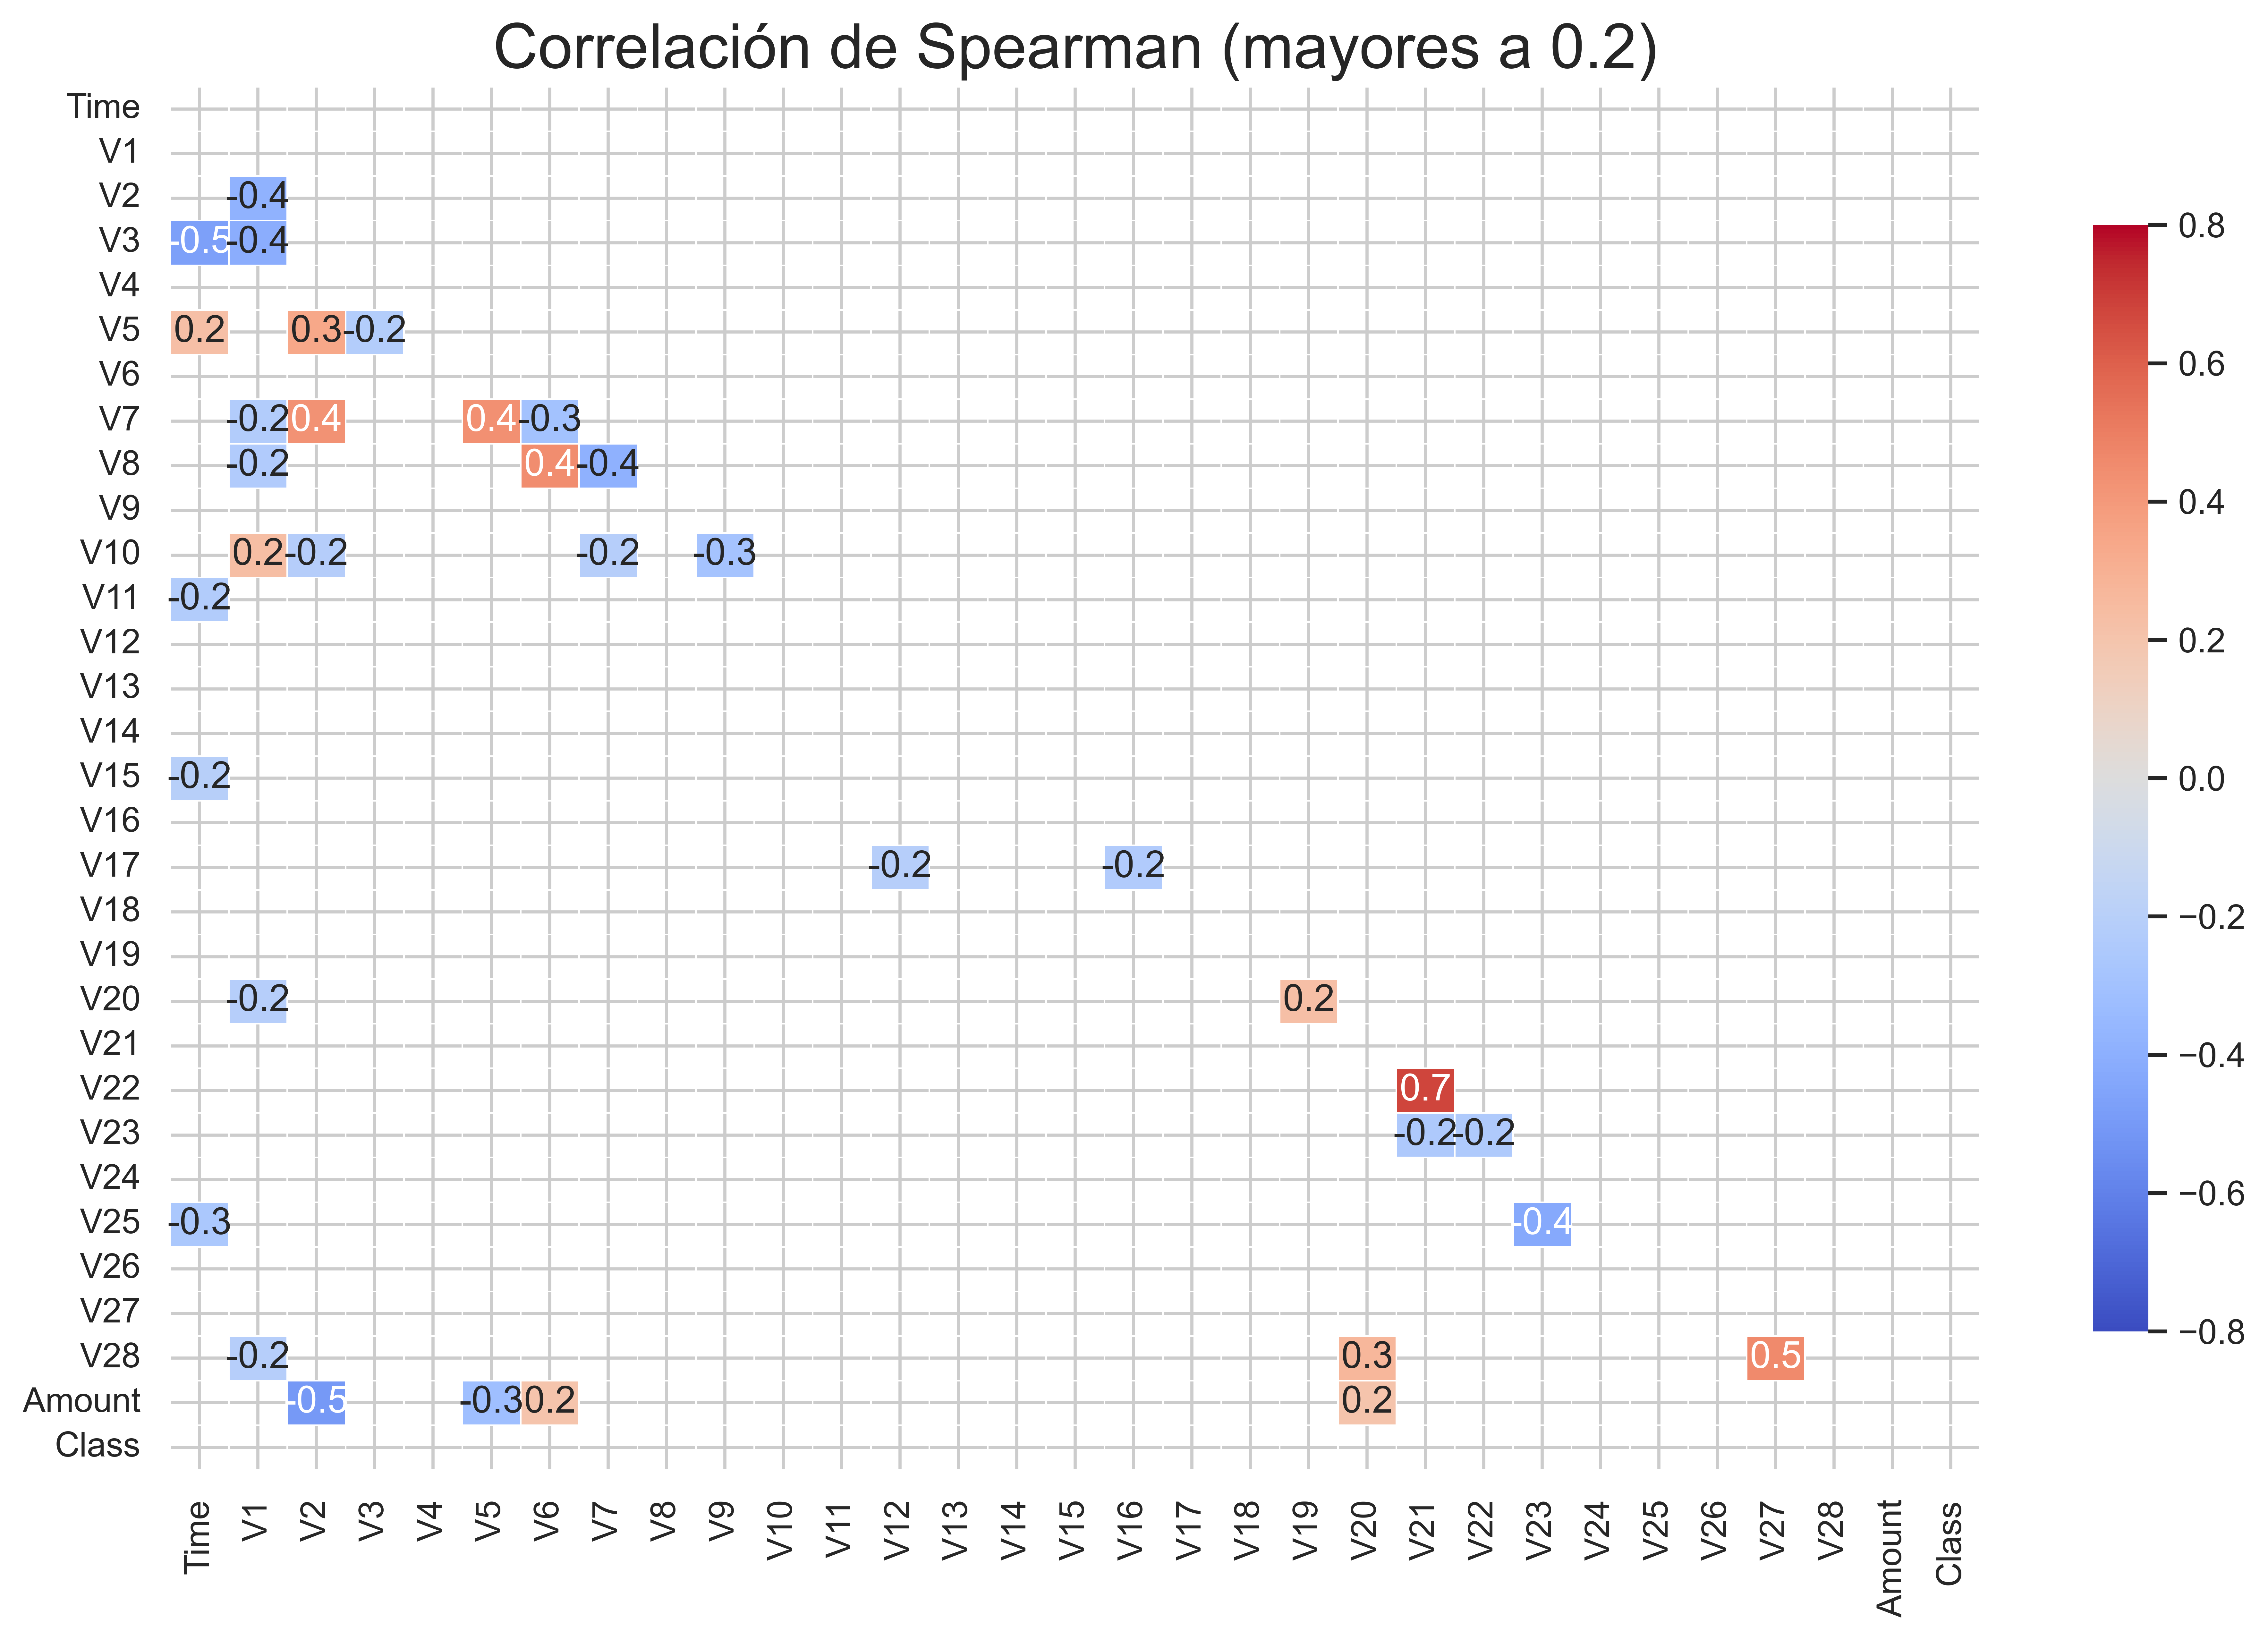

In [35]:
# Calcular la matriz de correlación de Spearman
corr_matrix = df[num_columns].corr(method='spearman')#.apply(lambda x:np.round(x,1))

# Reemplazar las correlaciones menores o iguales a 0.1 con NaN
filtered_corr_matrix = corr_matrix.where(abs(corr_matrix) > 0.2)

# Crear una máscara para eliminar el lado izquierdo
mask = np.triu(np.ones_like(filtered_corr_matrix, dtype=bool))

# Configuración del tamaño de la figura
plt.figure(figsize=(13, 8), dpi=700)

# Crear el heatmap con la máscara, sólo mostrando la mitad superior (eliminando el lado izquierdo)
sns.heatmap(filtered_corr_matrix, annot=True, fmt=".1f", linewidth=.5, cmap='coolwarm', vmin=-0.8, vmax=0.8, 
            mask=mask, cbar_kws={'shrink': 0.8})

# Título del gráfico
plt.title("Correlación de Spearman (mayores a 0.2)", fontsize=20)

# Mostrar el gráfico
plt.show()

A partir del análisis de correlación de Spearman, se confirma que no existen relaciones suficientemente altas entre variables como para justificar su eliminación por multicolinealidad. Esto es esperable, dado que las variables V1–V28 son el resultado de un PCA, y por tanto están diseñadas para ser ortogonales entre sí.

Las variables con mayores relaciones son:
V22 y V21 con 0.7
V27 y V28 con 0.5
Amount y V2 con -0.5
Time y V3 con -0.5
V7 y V2 con 0.4
V7 y V5 con 0.4
V8 y V6 con 0.4
V5 y V24 con -0.4
V7 y V8 con -0.4
V1 y V2 con -0.4
V1 y V3 con -0.4

Existen algunas variables que tienen una correlación moderada, sin embargo, no existe ninguna que tenga una correlación muy alta como para que tenga que ser eliminada o transformadas. La variable que parece tener más correlaciones altas son V1, V7 y Time.

In [36]:
correlation = df[num_columns].corrwith(df['Class'])
print(correlation)

Time     -0.013347
V1       -0.095316
V2        0.089084
V3       -0.188841
V4        0.134112
V5       -0.089921
V6       -0.044696
V7       -0.181737
V8        0.024712
V9       -0.097186
V10      -0.215498
V11       0.155963
V12      -0.263396
V13      -0.002034
V14      -0.306055
V15      -0.004357
V16      -0.197413
V17      -0.326790
V18      -0.111447
V19       0.035543
V20       0.017866
V21       0.041905
V22       0.000824
V23      -0.005989
V24      -0.007302
V25       0.002115
V26       0.005436
V27       0.019654
V28       0.010741
Amount    0.003807
Class     1.000000
dtype: float64


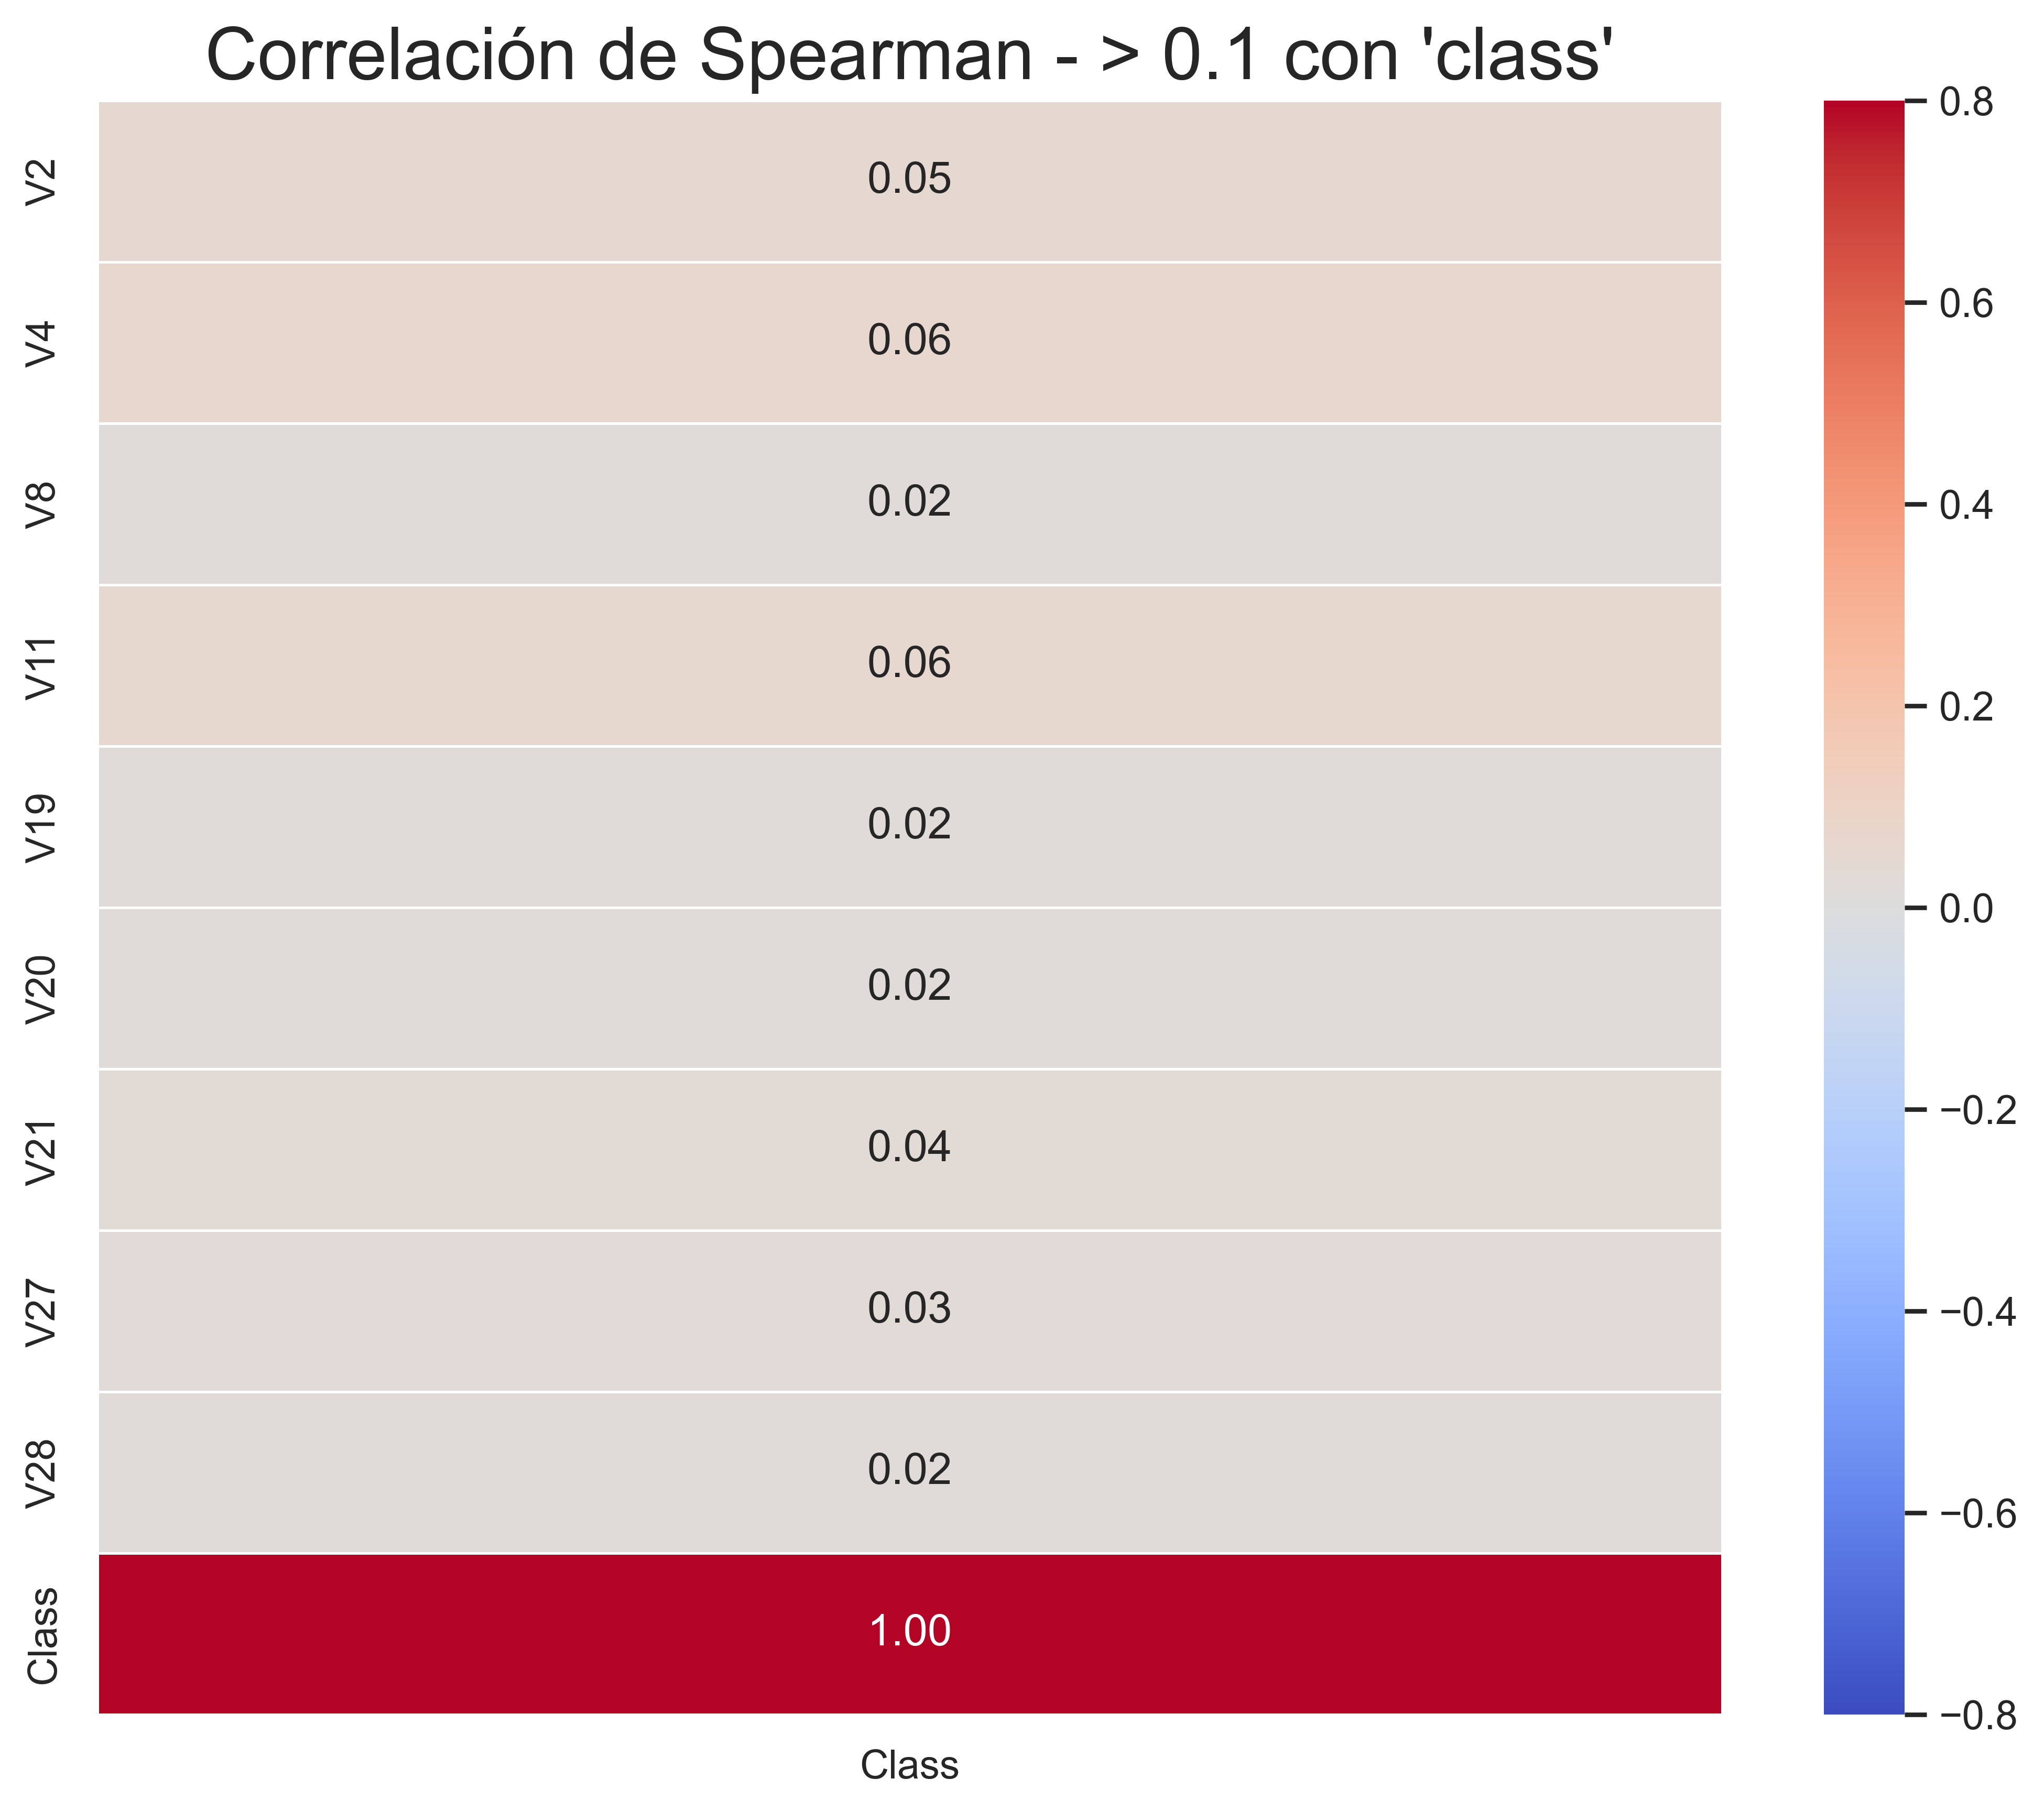

In [37]:
# Calcular la matriz de correlación de Spearman
corr_matrix = df[num_columns].corr(method='spearman')

# Filtrar la correlación de la columna 'class' con valores mayores a 0.03
filtered_corr = corr_matrix[["Class"]][corr_matrix["Class"] > 0.01]

# Crear el heatmap
plt.figure(figsize=(10, 8), dpi=500)
sns.heatmap(filtered_corr, annot=True, fmt=".2f", linewidth=.5, cmap='coolwarm', vmin=-0.8, vmax=0.8)
plt.title("Correlación de Spearman - > 0.1 con 'class'", fontsize=20)
plt.show()

Estas variables podrían servir como punto de partida para una selección preliminar, pero no deben considerarse en exclusiva. La baja correlación no implica falta de valor predictivo. Por tanto, se recomienda conservar todas las variables y emplear técnicas supervisadas (como modelos con `feature_importance_`, `permutation importance` o SHAP) para una selección posterior más robusta y fiable.

Respecto a la variable objetivo, se puede ver que todas las variables tienen una correlación baja, si se filtran los valores mayores de 0.01, se puede ver que solo las variables V2, V4, V8, V11, V19, V20, V21, V27 y V28. Y entre estas, las que tienen la mayor correlación son V4 y V11 con una correlación del 0.06.

## Validación de hipótesis iniciales

A lo largo del análisis se han contrastado las hipótesis formuladas al inicio del estudio:

-  **Desbalance de clases**: Se confirma que el dataset está fuertemente desbalanceado, con aproximadamente un 0.17 % de transacciones fraudulentas. Esto condicionará la elección de métricas y métodos de modelado.

In [38]:
df['Class'].value_counts(normalize=True)*100

Class
0    99.827075
1     0.172925
Name: proportion, dtype: float64

- **Presencia de outliers extremos**: Se han detectado valores atípicos significativos mediante el análisis de IQR, asimetría (skew) y curtosis. Estos justifican el uso de técnicas de transformación (log1p, winsorización) o escalado robusto.

  
- **No viable aplicar un nuevo PCA**: El análisis de componentes principales confirma que ya se ha aplicado una reducción de dimensionalidad previa, y no existe un codo o caída abrupta que justifique una nueva reducción. La información está repartida de forma relativamente uniforme entre las componentes.


## Conclusiones

- **Correlación débil con la clase objetivo**:  la correlación de cada variable individual con la clase (Class) es muy baja puede ser por el desbalance extremo o por la anonimizacion de los datos.

El análisis exploratorio confirma que nos enfrentamos a un problema de clasificación binaria con un dataset altamente desbalanceado: solo el 0.17 % de las transacciones son fraudulentas. Todas las variables numéricas provienen de una transformación previa mediante PCA, salvo `Time` y `Amount`, lo que limita su interpretabilidad individual.

No existen valores nulos, y los tipos de datos son correctos. Se detectan numerosos outliers, confirmados mediante asimetría (skew), curtosis y el rango intercuartílico. Esto sugiere la necesidad de aplicar técnicas de winsorización, transformaciones como `log1p` (especialmente en `Amount`) o escalado robusto.

El análisis univariable muestra distribuciones altamente sesgadas, mientras que el bivariado identifica variables con diferencias claras entre clases.

Las correlaciones entre variables son en general bajas, lo cual es coherente con el uso de PCA. Las correlaciones con la variable objetivo (`Class`) son muy débiles (ρ < 0.07), por lo que se descarta usar la correlación como criterio de selección de variables. Se recomienda conservar todas las variables y realizar una selección supervisada posterior (usando `feature_importance_`, `permutation importance`, SHAP…).

Finalmente, se valida que no es viable aplicar una nueva reducción de dimensionalidad: el nuevo PCA sobre las variables ya transformadas muestra que la varianza está repartida entre casi todas las componentes.

El EDA establece así una base sólida para el preprocesamiento y modelado posterior, con criterios claros para el tratamiento de outliers, selección de variables y técnicas de evaluación acordes al desbalance de clases.


##### Preprocesado:
- No existen missing values en el dataset que tengamos que tratar.
- Se han detectado registros duplicados, pero dado que no existe ningún identificador único ni variables temporales detalladas, se considera que pueden ser transacciones distintas que coinciden en sus valores. No se han eliminado.
- Los tipos de las variables parecen correctos.
- Hay muchos outliers que tenemos que tratar para que el dataset sea optimo, ya que la asimetría y la curtosis son muy altas en algunos casos.
- Amount (log1p): Reduce sesgo, homogeneiza la varianza, mejora la robustez frente a outliers. Recomendable aplicarla a la hora de llevar a cabo predicciones.